BREAST CANCER DATASET - INITIAL EXPLORATION

[1] First 5 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980          

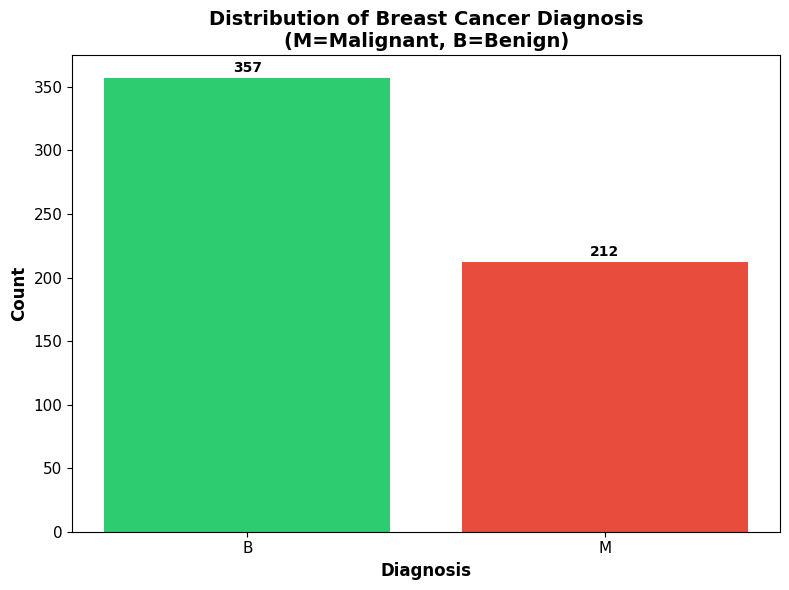


[6] Basic Statistical Summary:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std          

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# 1. Load the breast cancer dataset
df = pd.read_csv('/content/data.csv')

print("="*80)
print("BREAST CANCER DATASET - INITIAL EXPLORATION")
print("="*80)

# 2. Display first 5 rows to understand data structure
print("\n[1] First 5 rows of the dataset:")
print(df.head())

# 3. Display column information (data types, non-null counts)
print("\n[2] Dataset Information:")
print(df.info())

# Display shape of dataset
print(f"\n[3] Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")

# 4. Check for missing values
print("\n[4] Missing Values Check:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found in the dataset")
else:
    print(missing[missing > 0])

# 5. Show distribution of target variable 'diagnosis'
print("\n[5] Target Variable Distribution:")
print(df['diagnosis'].value_counts())
print("\nPercentage Distribution:")
print(df['diagnosis'].value_counts(normalize=True) * 100)

# Visualize the distribution
plt.figure(figsize=(8, 6))
diagnosis_counts = df['diagnosis'].value_counts()
plt.bar(diagnosis_counts.index, diagnosis_counts.values, color=['#2ecc71', '#e74c3c'])
plt.xlabel('Diagnosis', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Breast Cancer Diagnosis\n(M=Malignant, B=Benign)',
          fontsize=14, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add count labels on bars
for i, v in enumerate(diagnosis_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Display basic statistics
print("\n[6] Basic Statistical Summary:")
print(df.describe())

print("\n" + "="*80)
print("Initial exploration complete!")
print("="*80)

ADVANCED EXPLORATORY DATA ANALYSIS

[1] Generating Correlation Heatmap...


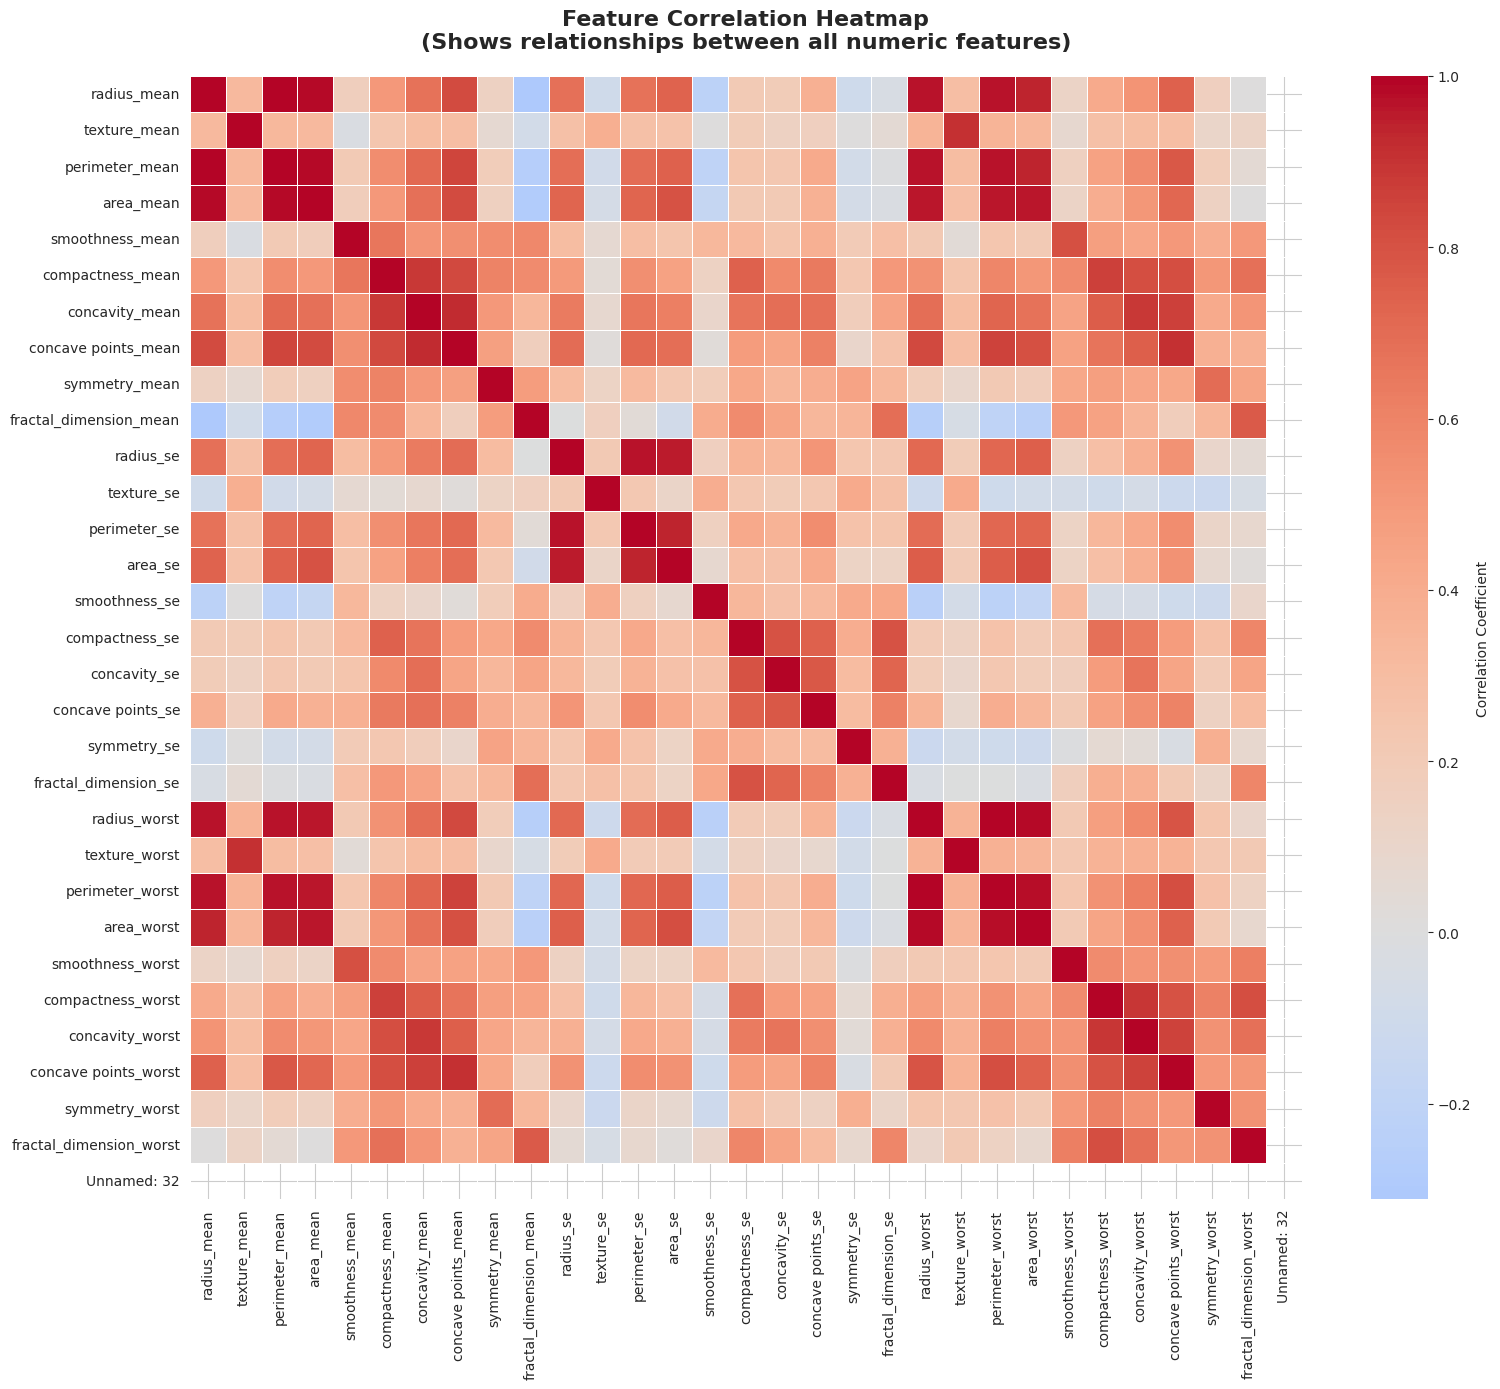


Highly Correlated Feature Pairs (|correlation| > 0.8):
  radius_mean <-> perimeter_mean: 0.998
  radius_mean <-> area_mean: 0.987
  radius_mean <-> concave points_mean: 0.823
  radius_mean <-> radius_worst: 0.970
  radius_mean <-> perimeter_worst: 0.965
  radius_mean <-> area_worst: 0.941
  texture_mean <-> texture_worst: 0.912
  perimeter_mean <-> area_mean: 0.987
  perimeter_mean <-> concave points_mean: 0.851
  perimeter_mean <-> radius_worst: 0.969

[2] Generating Pairplot for Key Features...


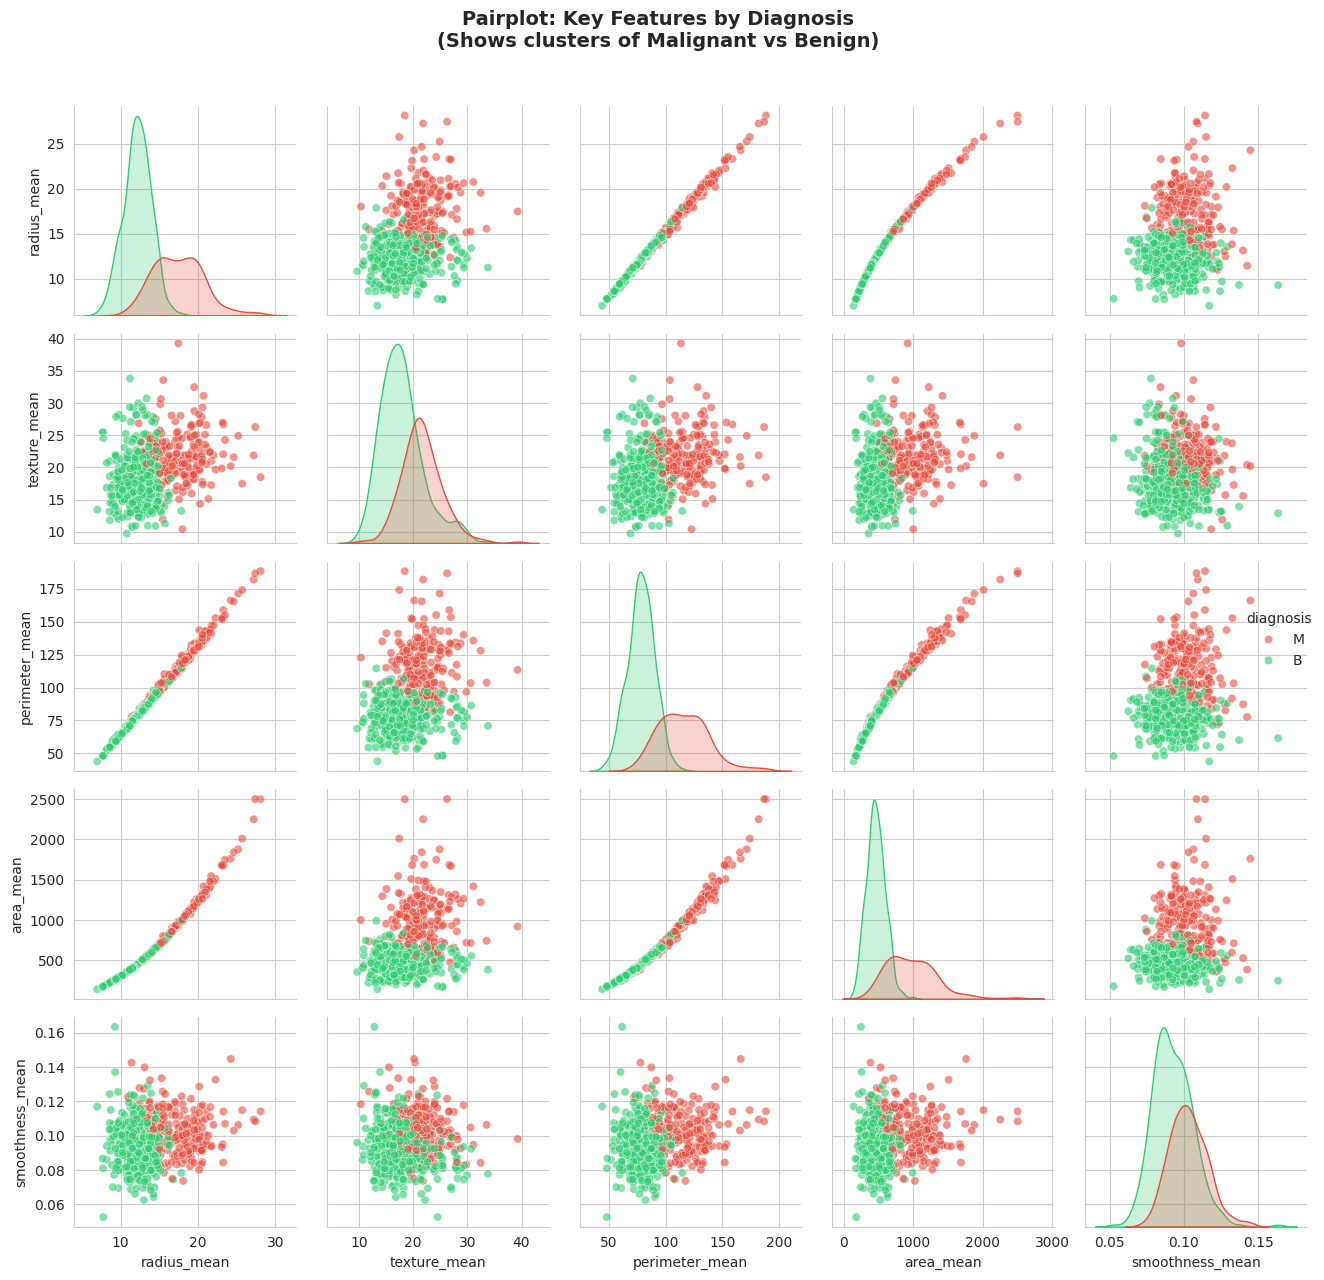


[3] Generating Boxplots for Feature Distributions...


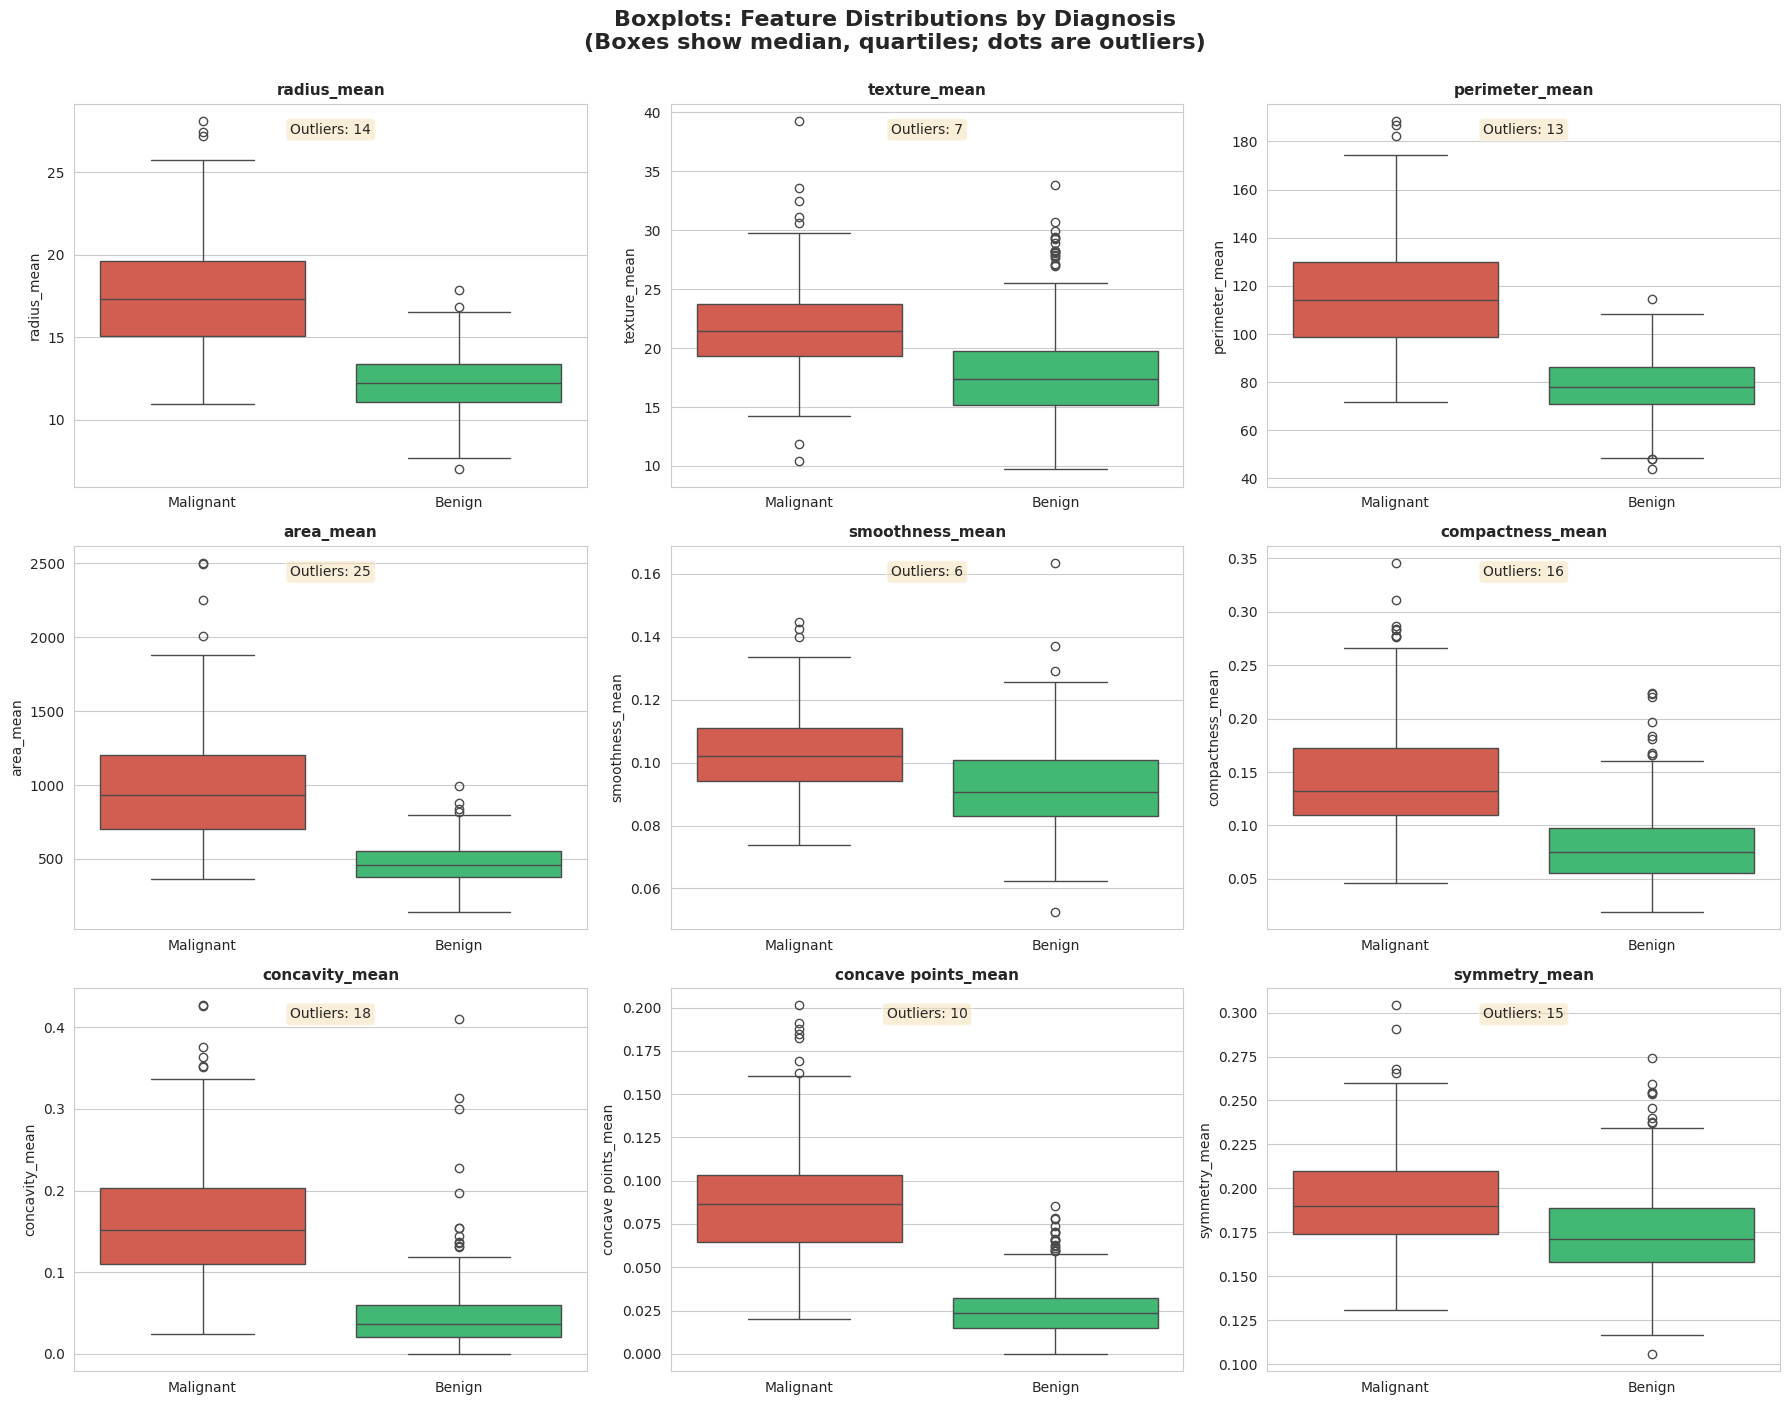


[4] Summary Statistics by Diagnosis:
--------------------------------------------------------------------------------

B (Benign):
       radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
count       357.00        357.00          357.00     357.00           357.00   
mean         12.15         17.91           78.08     462.79             0.09   
std           1.78          4.00           11.81     134.29             0.01   
min           6.98          9.71           43.79     143.50             0.05   
25%          11.08         15.15           70.87     378.20             0.08   
50%          12.20         17.39           78.18     458.40             0.09   
75%          13.37         19.76           86.10     551.10             0.10   
max          17.85         33.81          114.60     992.10             0.16   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  
count            357.00          357.00               357.00         

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset
df = pd.read_csv('/content/data.csv')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("="*80)
print("ADVANCED EXPLORATORY DATA ANALYSIS")
print("="*80)

# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove 'id' if present as it's not meaningful for analysis
if 'id' in numeric_cols:
    numeric_cols.remove('id')

# 1. CORRELATION HEATMAP
# Shows relationships between features - high correlation may indicate redundancy
print("\n[1] Generating Correlation Heatmap...")
plt.figure(figsize=(16, 14))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Heatmap\n(Shows relationships between all numeric features)',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find highly correlated feature pairs (correlation > 0.8)
print("\nHighly Correlated Feature Pairs (|correlation| > 0.8):")
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr.append((correlation_matrix.columns[i],
                            correlation_matrix.columns[j],
                            correlation_matrix.iloc[i, j]))
for pair in high_corr[:10]:  # Show top 10
    print(f"  {pair[0]} <-> {pair[1]}: {pair[2]:.3f}")

# 2. PAIRPLOT FOR KEY FEATURES
# Visualizes distributions and relationships between important features
# Select a subset of key features for pairplot (to avoid overcrowding)
print("\n[2] Generating Pairplot for Key Features...")
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean',
                'area_mean', 'smoothness_mean', 'diagnosis']
if all(col in df.columns for col in key_features):
    sns.pairplot(df[key_features], hue='diagnosis', palette={'M': '#e74c3c', 'B': '#2ecc71'},
                 diag_kind='kde', plot_kws={'alpha': 0.6}, height=2.5)
    plt.suptitle('Pairplot: Key Features by Diagnosis\n(Shows clusters of Malignant vs Benign)',
                 y=1.02, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("  Note: Some key features not found, skipping pairplot")

# 3. BOXPLOTS FOR FEATURE DISTRIBUTIONS
# Identifies outliers and shows distribution differences between diagnoses
print("\n[3] Generating Boxplots for Feature Distributions...")
# Select mean features only for cleaner visualization
mean_features = [col for col in df.columns if 'mean' in col.lower()][:9]

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for idx, col in enumerate(mean_features):
    if idx < len(axes):
        # Create boxplot comparing benign vs malignant
        df_plot = df[[col, 'diagnosis']].copy()
        df_plot['diagnosis'] = df_plot['diagnosis'].map({'M': 'Malignant', 'B': 'Benign'})

        sns.boxplot(data=df_plot, x='diagnosis', y=col, ax=axes[idx],
                   palette={'Malignant': '#e74c3c', 'Benign': '#2ecc71'})
        axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('')

        # Calculate and display outliers count
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
        axes[idx].text(0.5, 0.95, f'Outliers: {len(outliers)}',
                      transform=axes[idx].transAxes, ha='center', va='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Boxplots: Feature Distributions by Diagnosis\n(Boxes show median, quartiles; dots are outliers)',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# 4. SUMMARY STATISTICS WITH INSIGHTS
print("\n[4] Summary Statistics by Diagnosis:")
print("-" * 80)

# Group by diagnosis and show key statistics
for diagnosis in ['B', 'M']:
    print(f"\n{diagnosis} ({'Benign' if diagnosis == 'B' else 'Malignant'}):")
    subset = df[df['diagnosis'] == diagnosis][mean_features]
    print(subset.describe().round(2))

# Statistical test: t-test for mean differences
print("\n[5] Statistical Significance Tests (t-test for mean differences):")
print("-" * 80)
print("Testing if features significantly differ between Benign and Malignant cases:")
print(f"{'Feature':<30} {'t-statistic':<15} {'p-value':<15} {'Significant?'}")
print("-" * 80)

for col in mean_features:
    benign_vals = df[df['diagnosis'] == 'B'][col].dropna()
    malignant_vals = df[df['diagnosis'] == 'M'][col].dropna()

    t_stat, p_val = stats.ttest_ind(benign_vals, malignant_vals)
    significant = "Yes ***" if p_val < 0.001 else "Yes **" if p_val < 0.01 else "Yes *" if p_val < 0.05 else "No"
    print(f"{col:<30} {t_stat:<15.3f} {p_val:<15.6f} {significant}")

print("\n" + "="*80)
print("KEY INSIGHTS:")
print("="*80)
print("1. Correlation Heatmap: Identifies multicollinearity between features")
print("2. Pairplot: Shows clear separation between benign/malignant in certain features")
print("3. Boxplots: Malignant tumors generally have larger size measurements")
print("4. Statistical Tests: Most features show significant differences (p < 0.05)")
print("="*80)

DATA PREPROCESSING & FEATURE ENGINEERING

Original dataset shape: (569, 33)

[1] Converting 'diagnosis' to numeric values...
    Mapping: M (Malignant) -> 1, B (Benign) -> 0
    Class distribution: 
diagnosis
0    357
1    212
Name: count, dtype: int64

[2] Dropping 'id' and 'Unnamed: 32' columns...
    'id' column removed successfully
    'Unnamed: 32' column removed successfully

[3] Separating features and target variable...
    Features (X) shape: (569, 30)
    Target (y) shape: (569,)
    Number of features: 30

[4] Splitting data into train/test sets (80/20 split)...
    Training set: 455 samples
    Testing set: 114 samples
    Class distribution in training set:
      Benign (0): 285 (62.6%)
      Malignant (1): 170 (37.4%)

[5] Scaling features using StandardScaler...
    Why? Many ML algorithms perform better when features are on similar scales
    Features scaled successfully
    Example - Before scaling (first feature): mean=14.17, std=3.58
    Example - After scaling (firs

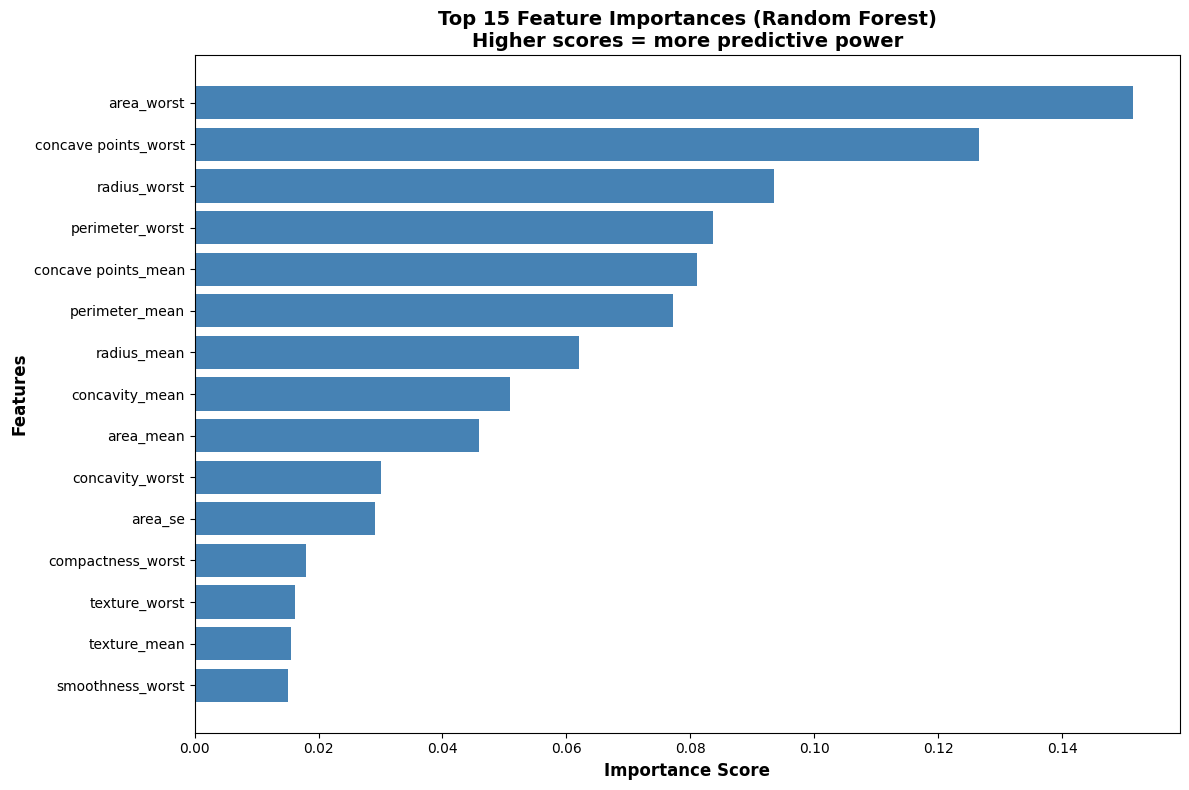


    Selected 16 features explaining 90% of importance

[7] Feature Selection - Recursive Feature Elimination (RFE)...
    Why? Systematically removes least important features

    Top 10 Features Selected by RFE:
      1. radius_mean
      2. perimeter_mean
      3. area_mean
      4. concavity_mean
      5. concave points_mean
      6. radius_worst
      7. texture_worst
      8. perimeter_worst
      9. area_worst
      10. concave points_worst

[8] Principal Component Analysis (PCA) - Optional...
    Why? Reduces dimensions while retaining maximum variance
    Original number of features: 30
    PCA components (95% variance): 10
    Variance explained: 95.21%


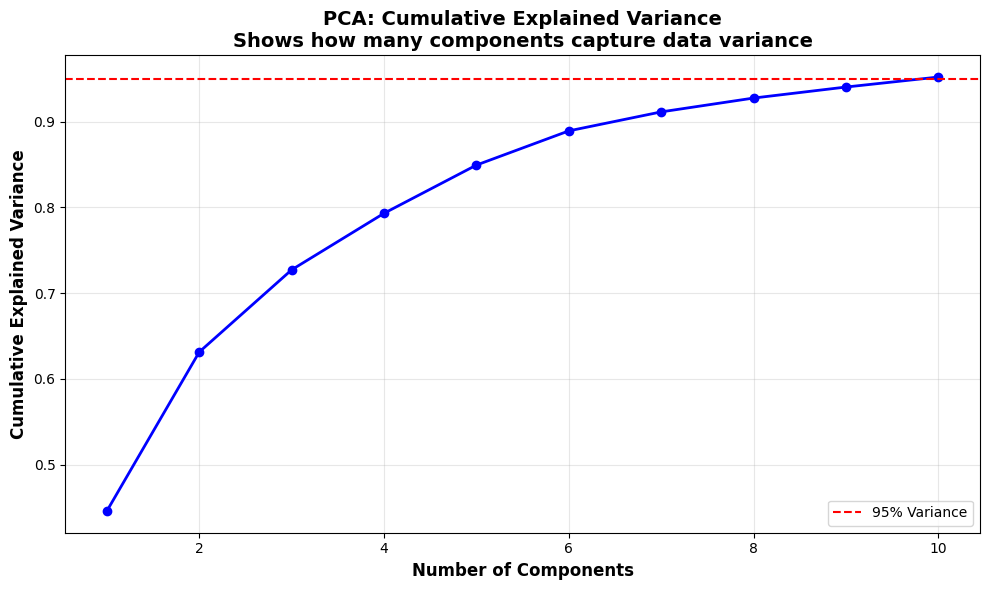


PREPROCESSING SUMMARY
1. Original features: 30
2. After scaling: 30 (all features)
3. After RFE selection: 10 features
4. After PCA: 10 components

Training samples: 455
Testing samples: 114

WHY PREPROCESSING MATTERS:
  • Scaling: Ensures fair treatment of all features
  • Feature Selection: Reduces overfitting and improves interpretability
  • PCA: Further reduces dimensionality while preserving information

✓ Preprocessed datasets ready for model training!


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("DATA PREPROCESSING & FEATURE ENGINEERING")
print("="*80)

# Load dataset
df = pd.read_csv('/content/data.csv')
print(f"\nOriginal dataset shape: {df.shape}")

# STEP 1: Convert diagnosis to numeric
# M (Malignant) = 1, B (Benign) = 0
# This converts the target variable to a format suitable for machine learning
print("\n[1] Converting 'diagnosis' to numeric values...")
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print("    Mapping: M (Malignant) -> 1, B (Benign) -> 0")
print(f"    Class distribution: \n{df['diagnosis'].value_counts()}")

# STEP 2: Drop the 'id' and 'Unnamed: 32' columns
# 'id' is just an identifier and doesn't provide predictive value
# 'Unnamed: 32' is an empty column with NaN values, causing issues for PCA
print("\n[2] Dropping 'id' and 'Unnamed: 32' columns...")
columns_to_drop = ['id', 'Unnamed: 32']
for col in columns_to_drop:
    if col in df.columns:
        df = df.drop(col, axis=1)
        print(f"    '{col}' column removed successfully")
    else:
        print(f"    '{col}' column not found in dataset")

# STEP 3: Separate features (X) and target (y)
print("\n[3] Separating features and target variable...")
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
print(f"    Features (X) shape: {X.shape}")
print(f"    Target (y) shape: {y.shape}")
print(f"    Number of features: {X.shape[1]}")

# STEP 4: Split data into training and testing sets
# 80% for training, 20% for testing
# random_state ensures reproducibility
print("\n[4] Splitting data into train/test sets (80/20 split)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"    Training set: {X_train.shape[0]} samples")
print(f"    Testing set: {X_test.shape[0]} samples")
print(f"    Class distribution in training set:")
print(f"      Benign (0): {sum(y_train == 0)} ({sum(y_train == 0)/len(y_train)*100:.1f}%)")
print(f"      Malignant (1): {sum(y_train == 1)} ({sum(y_train == 1)/len(y_train)*100:.1f}%)")

# STEP 5: Feature Scaling using StandardScaler
# Scaling ensures all features have mean=0 and std=1
# This is crucial for algorithms sensitive to feature magnitudes (SVM, Logistic Regression)
print("\n[5] Scaling features using StandardScaler...")
print("    Why? Many ML algorithms perform better when features are on similar scales")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print(f"    Features scaled successfully")
print(f"    Example - Before scaling (first feature): mean={X_train.iloc[:, 0].mean():.2f}, std={X_train.iloc[:, 0].std():.2f}")
print(f"    Example - After scaling (first feature): mean={X_train_scaled.iloc[:, 0].mean():.2f}, std={X_train_scaled.iloc[:, 0].std():.2f}")

# STEP 6: Feature Selection using Random Forest Feature Importance
print("\n[6] Feature Selection - Random Forest Feature Importance...")
print("    Why? Identifies most predictive features and reduces overfitting")

# Train Random Forest to get feature importances
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_selector.fit(X_train_scaled, y_train)

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)

print("\n    Top 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

# Visualize feature importances
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='steelblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 15 Feature Importances (Random Forest)\nHigher scores = more predictive power',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Select top features (those with cumulative importance >= 90%)
cumsum_importance = feature_importance['importance'].cumsum()
n_features_90 = (cumsum_importance <= 0.90).sum() + 1
selected_features_rf = feature_importance['feature'].head(n_features_90).tolist()
print(f"\n    Selected {n_features_90} features explaining 90% of importance")

# STEP 7: Recursive Feature Elimination (RFE)
print("\n[7] Feature Selection - Recursive Feature Elimination (RFE)...")
print("    Why? Systematically removes least important features")

# Use RFE with Random Forest to select top 10 features
rfe_selector = RFE(estimator=RandomForestClassifier(random_state=42),
                   n_features_to_select=10, step=1)
rfe_selector.fit(X_train_scaled, y_train)

# Get selected features
rfe_features = X.columns[rfe_selector.support_].tolist()
print(f"\n    Top 10 Features Selected by RFE:")
for i, feat in enumerate(rfe_features, 1):
    print(f"      {i}. {feat}")

# Create datasets with selected features
X_train_rfe = X_train_scaled[rfe_features]
X_test_rfe = X_test_scaled[rfe_features]

# STEP 8: Optional - PCA for Dimensionality Reduction
print("\n[8] Principal Component Analysis (PCA) - Optional...")
print("    Why? Reduces dimensions while retaining maximum variance")

# Apply PCA
pca = PCA(n_components=0.95, random_state=42)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"    Original number of features: {X_train_scaled.shape[1]}")
print(f"    PCA components (95% variance): {X_train_pca.shape[1]}")
print(f"    Variance explained: {pca.explained_variance_ratio_.sum()*100:.2f}%")

# Visualize explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), 'bo-', linewidth=2)
plt.xlabel('Number of Components', fontsize=12, fontweight='bold')
plt.ylabel('Cumulative Explained Variance', fontsize=12, fontweight='bold')
plt.title('PCA: Cumulative Explained Variance\nShows how many components capture data variance',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.tight_layout()
plt.show()

# SUMMARY: Save preprocessed datasets for model training
print("\n" + "="*80)
print("PREPROCESSING SUMMARY")
print("="*80)
print(f"1. Original features: {X.shape[1]}")
print(f"2. After scaling: {X_train_scaled.shape[1]} (all features)")
print(f"3. After RFE selection: {X_train_rfe.shape[1]} features")
print(f"4. After PCA: {X_train_pca.shape[1]} components")
print(f"\nTraining samples: {X_train_scaled.shape[0]}")
print(f"Testing samples: {X_test_scaled.shape[0]}")
print("\nWHY PREPROCESSING MATTERS:")
print("  • Scaling: Ensures fair treatment of all features")
print("  • Feature Selection: Reduces overfitting and improves interpretability")
print("  • PCA: Further reduces dimensionality while preserving information")
print("="*80)

# Store variables for next steps (in practice, you'd save these)
print("\n✓ Preprocessed datasets ready for model training!")

TRAINING MULTIPLE CLASSIFICATION MODELS

Dataset prepared: 455 training, 114 testing samples
Number of features: 30

MODEL TRAINING & EVALUATION

Training: Logistic Regression
  [1] Training model...
  [2] Calculating evaluation metrics...
  [3] Performing 5-fold cross-validation...

  TEST SET PERFORMANCE:
    Accuracy:  0.9649 (% of correct predictions)
    Precision: 0.9750 (% of positive predictions that are correct)
    Recall:    0.9286 (% of actual positives correctly identified)
    F1-Score:  0.9512 (harmonic mean of precision and recall)
    ROC-AUC:   0.9960 (ability to distinguish between classes)

  CROSS-VALIDATION (5-fold):
    Mean Accuracy: 0.9714 ± 0.0112
    Individual folds: ['0.9670', '0.9890', '0.9560', '0.9780', '0.9670']

  DETAILED CLASSIFICATION REPORT:
               precision    recall  f1-score   support

   Benign (0)     0.9595    0.9861    0.9726        72
Malignant (1)     0.9750    0.9286    0.9512        42

     accuracy                         0.964

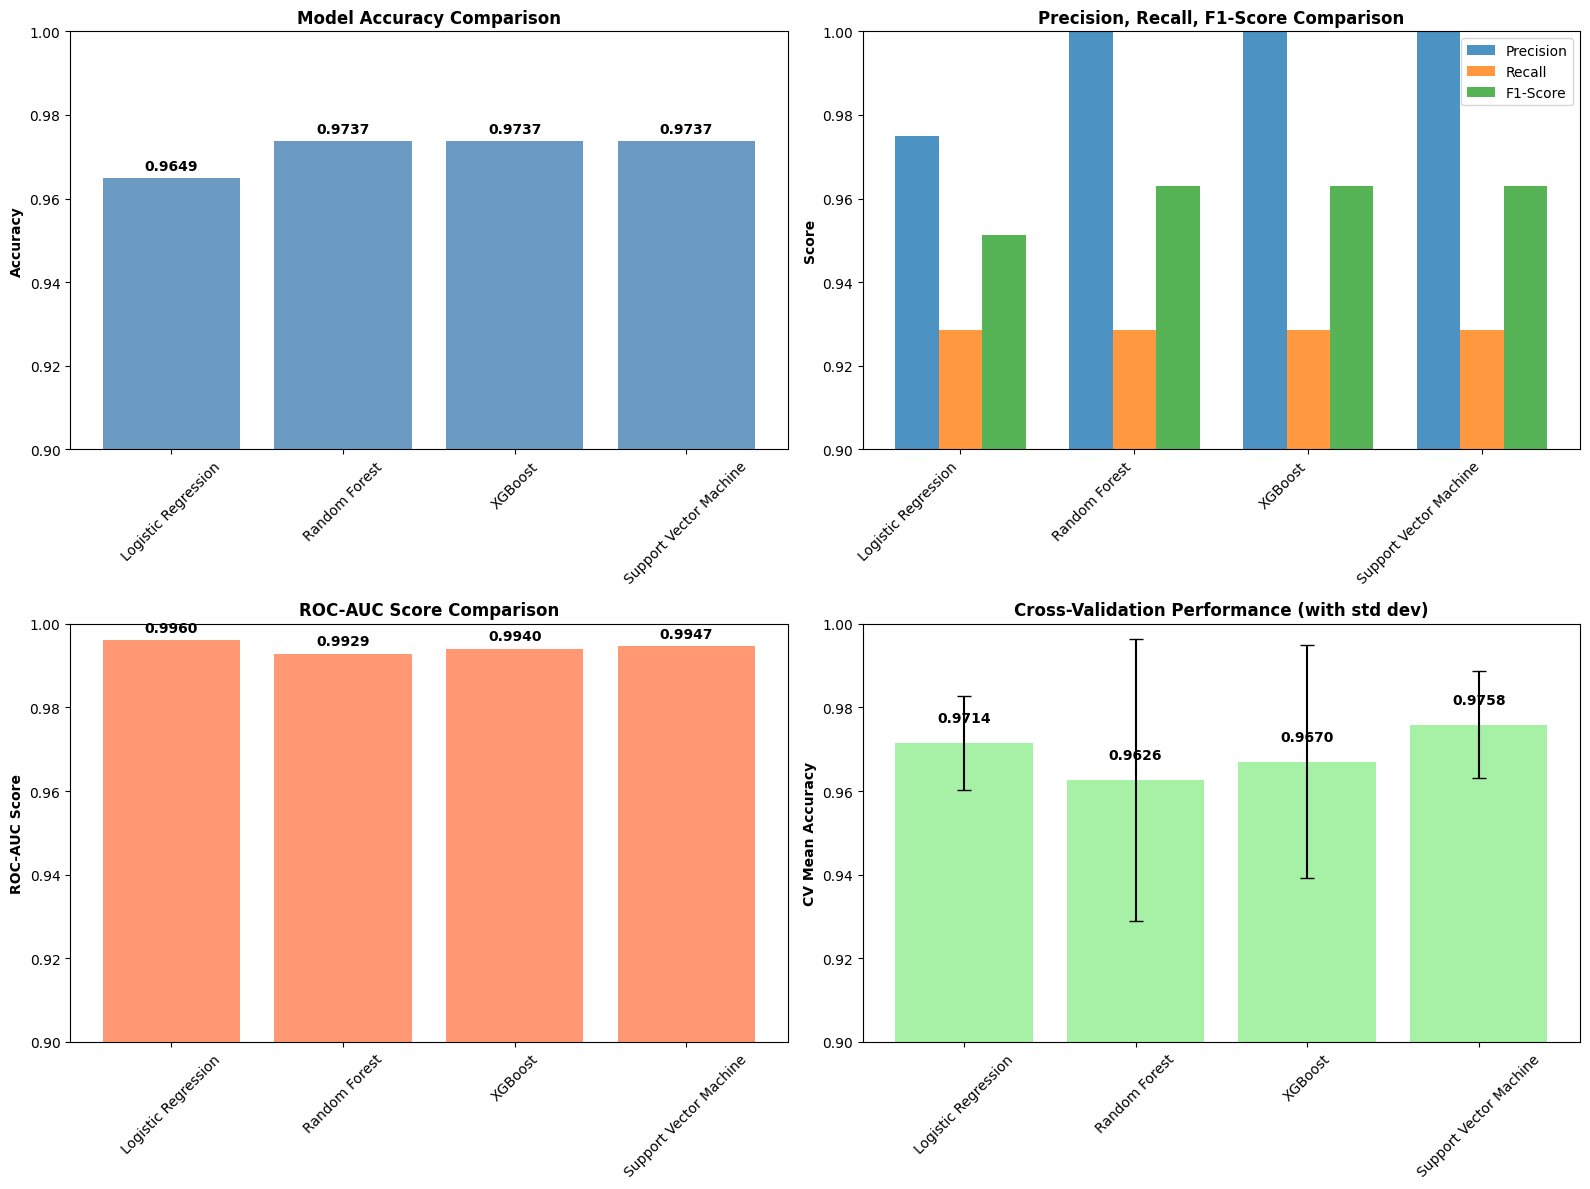


KEY INSIGHTS
METRIC EXPLANATIONS:
  • Accuracy: Overall correctness (but can be misleading with imbalanced data)
  • Precision: Of predicted malignant cases, how many are actually malignant?
  • Recall: Of actual malignant cases, how many did we catch?
  • F1-Score: Balance between precision and recall
  • ROC-AUC: Overall ability to distinguish between classes (0.5=random, 1.0=perfect)

FOR CANCER DIAGNOSIS:
  • High RECALL is critical (we don't want to miss malignant cases)
  • High PRECISION is also important (avoid false alarms)
  • F1-Score and ROC-AUC provide balanced overall performance measures


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report)
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("TRAINING MULTIPLE CLASSIFICATION MODELS")
print("="*80)

# Load and preprocess data (quick version for model training)
df = pd.read_csv('/content/data.csv')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Drop 'id' and 'Unnamed: 32' columns
columns_to_drop = ['id', 'Unnamed: 32']
for col in columns_to_drop:
    if col in df.columns:
        df = df.drop(col, axis=1)

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nDataset prepared: {X_train_scaled.shape[0]} training, {X_test_scaled.shape[0]} testing samples")
print(f"Number of features: {X_train_scaled.shape[1]}")

# Define models to train
# Each model has different strengths and approaches to classification
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss'),
    'Support Vector Machine': SVC(kernel='rbf', probability=True, random_state=42)
}

print("\n" + "="*80)
print("MODEL TRAINING & EVALUATION")
print("="*80)

# Store results for comparison
results = []

for model_name, model in models.items():
    print(f"\n{'='*80}")
    print(f"Training: {model_name}")
    print(f"{'='*80}")

    # Train the model
    print("  [1] Training model...")
    model.fit(X_train_scaled, y_train)

    # Make predictions on test set
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate evaluation metrics
    print("  [2] Calculating evaluation metrics...")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Perform 5-fold cross-validation on training set
    # This gives us a more robust estimate of model performance
    print("  [3] Performing 5-fold cross-validation...")
    cv_scores = cross_val_score(model, X_train_scaled, y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Display results
    print(f"\n  TEST SET PERFORMANCE:")
    print(f"    Accuracy:  {accuracy:.4f} (% of correct predictions)")
    print(f"    Precision: {precision:.4f} (% of positive predictions that are correct)")
    print(f"    Recall:    {recall:.4f} (% of actual positives correctly identified)")
    print(f"    F1-Score:  {f1:.4f} (harmonic mean of precision and recall)")
    print(f"    ROC-AUC:   {roc_auc:.4f} (ability to distinguish between classes)")

    print(f"\n  CROSS-VALIDATION (5-fold):")
    print(f"    Mean Accuracy: {cv_mean:.4f} \u00b1 {cv_std:.4f}")
    print(f"    Individual folds: {[f'{score:.4f}' for score in cv_scores]}")

    # Store results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV Mean': cv_mean,
        'CV Std': cv_std
    })

    # Detailed classification report
    print(f"\n  DETAILED CLASSIFICATION REPORT:")
    print(classification_report(y_test, y_pred,
                               target_names=['Benign (0)', 'Malignant (1)'],
                               digits=4))

# Create comparison table
print("\n" + "="*80)
print("MODEL COMPARISON TABLE")
print("="*80)
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

# Find best model for each metric
print("\n" + "="*80)
print("BEST MODELS BY METRIC")
print("="*80)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
for metric in metrics:
    best_idx = results_df[metric].idxmax()
    best_model = results_df.loc[best_idx, 'Model']
    best_score = results_df.loc[best_idx, metric]
    print(f"  {metric:<12}: {best_model:<30} ({best_score:.4f})")

# Visualize comparison
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Accuracy comparison
ax1 = axes[0, 0]
ax1.bar(results_df['Model'], results_df['Accuracy'], color='steelblue', alpha=0.8)
ax1.set_ylabel('Accuracy', fontweight='bold')
ax1.set_title('Model Accuracy Comparison', fontweight='bold', fontsize=12)
ax1.set_ylim([0.9, 1.0])
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['Accuracy']):
    ax1.text(i, v + 0.002, f'{v:.4f}', ha='center', fontweight='bold')

# Plot 2: Precision, Recall, F1-Score
ax2 = axes[0, 1]
x_pos = np.arange(len(results_df))
width = 0.25
ax2.bar(x_pos - width, results_df['Precision'], width, label='Precision', alpha=0.8)
ax2.bar(x_pos, results_df['Recall'], width, label='Recall', alpha=0.8)
ax2.bar(x_pos + width, results_df['F1-Score'], width, label='F1-Score', alpha=0.8)
ax2.set_ylabel('Score', fontweight='bold')
ax2.set_title('Precision, Recall, F1-Score Comparison', fontweight='bold', fontsize=12)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax2.legend()
ax2.set_ylim([0.9, 1.0])

# Plot 3: ROC-AUC Score
ax3 = axes[1, 0]
ax3.bar(results_df['Model'], results_df['ROC-AUC'], color='coral', alpha=0.8)
ax3.set_ylabel('ROC-AUC Score', fontweight='bold')
ax3.set_title('ROC-AUC Score Comparison', fontweight='bold', fontsize=12)
ax3.set_ylim([0.9, 1.0])
ax3.tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['ROC-AUC']):
    ax3.text(i, v + 0.002, f'{v:.4f}', ha='center', fontweight='bold')

# Plot 4: Cross-Validation Scores with error bars
ax4 = axes[1, 1]
ax4.bar(results_df['Model'], results_df['CV Mean'],
        yerr=results_df['CV Std'], capsize=5, color='lightgreen', alpha=0.8)
ax4.set_ylabel('CV Mean Accuracy', fontweight='bold')
ax4.set_title('Cross-Validation Performance (with std dev)', fontweight='bold', fontsize=12)
ax4.set_ylim([0.9, 1.0])
ax4.tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['CV Mean']):
    ax4.text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("KEY INSIGHTS")
print("="*80)
print("METRIC EXPLANATIONS:")
print("  \u2022 Accuracy: Overall correctness (but can be misleading with imbalanced data)")
print("  \u2022 Precision: Of predicted malignant cases, how many are actually malignant?")
print("  \u2022 Recall: Of actual malignant cases, how many did we catch?")
print("  \u2022 F1-Score: Balance between precision and recall")
print("  \u2022 ROC-AUC: Overall ability to distinguish between classes (0.5=random, 1.0=perfect)")
print("\nFOR CANCER DIAGNOSIS:")
print("  \u2022 High RECALL is critical (we don't want to miss malignant cases)")
print("  \u2022 High PRECISION is also important (avoid false alarms)")
print("  \u2022 F1-Score and ROC-AUC provide balanced overall performance measures")
print("="*80)

HYPERPARAMETER TUNING WITH GRIDSEARCHCV

Dataset: 455 training, 114 testing samples

1. RANDOM FOREST HYPERPARAMETER TUNING

[Step 1] Training baseline Random Forest...
  Baseline Accuracy: 0.9649
  Baseline F1-Score: 0.9500
  Baseline ROC-AUC: 0.9939

[Step 2] Defining hyperparameter grid for Random Forest...
  Total parameter combinations to test: 648
  Note: Testing all combinations would be very slow, using smaller grid...
  Focused grid combinations: 48

[Step 3] Running GridSearchCV (this may take a few minutes)...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

  GridSearchCV completed in 96.68 seconds

[Step 4] Best Random Forest parameters found:
  max_depth: 20
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 100

[Step 5] Evaluating optimized Random Forest...
  Optimized Accuracy: 0.9649
  Optimized F1-Score: 0.9500
  Optimized ROC-AUC: 0.9939

2. XGBOOST HYPERPARAMETER TUNING

[Step 1] Training baseline XGBoost...
  Baseline A

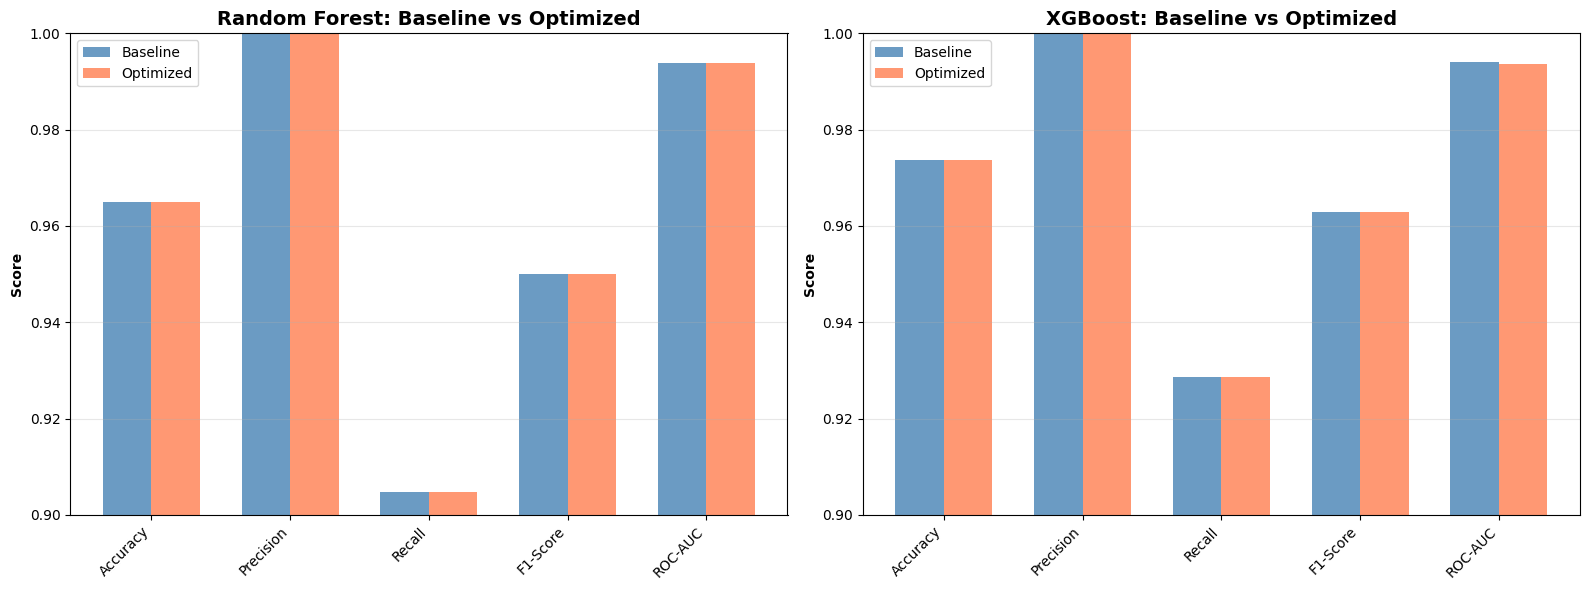


WHY HYPERPARAMETER TUNING MATTERS
• GridSearchCV systematically tests different parameter combinations
• Uses cross-validation to find parameters that generalize well
• Optimizes for specific metrics (here we used F1-score)
• Can significantly improve model performance on unseen data
• Helps prevent overfitting by finding the right balance of complexity


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, make_scorer)
import time
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("HYPERPARAMETER TUNING WITH GRIDSEARCHCV")
print("="*80)

# Load and preprocess data
df = pd.read_csv('/content/data.csv')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
if 'id' in df.columns:
    df = df.drop('id', axis=1)

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nDataset: {X_train_scaled.shape[0]} training, {X_test_scaled.shape[0]} testing samples")

# Function to evaluate and compare models
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate model and return comprehensive metrics"""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }

# ============================================================================
# 1. RANDOM FOREST HYPERPARAMETER TUNING
# ============================================================================
print("\n" + "="*80)
print("1. RANDOM FOREST HYPERPARAMETER TUNING")
print("="*80)

# Train baseline Random Forest
print("\n[Step 1] Training baseline Random Forest...")
rf_baseline = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_baseline.fit(X_train_scaled, y_train)
baseline_rf_results = evaluate_model(rf_baseline, X_test_scaled, y_test, 'RF Baseline')

print(f"  Baseline Accuracy: {baseline_rf_results['Accuracy']:.4f}")
print(f"  Baseline F1-Score: {baseline_rf_results['F1-Score']:.4f}")
print(f"  Baseline ROC-AUC: {baseline_rf_results['ROC-AUC']:.4f}")

# Define hyperparameter grid for Random Forest
# These parameters control model complexity and randomness
print("\n[Step 2] Defining hyperparameter grid for Random Forest...")
rf_param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees in forest
    'max_depth': [10, 20, 30, None],            # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],            # Min samples required to split node
    'min_samples_leaf': [1, 2, 4],              # Min samples required at leaf node
    'max_features': ['sqrt', 'log2', None],     # Number of features to consider
    'bootstrap': [True, False]                   # Whether to use bootstrap samples
}

total_combinations = np.prod([len(v) for v in rf_param_grid.values()])
print(f"  Total parameter combinations to test: {total_combinations}")
print("  Note: Testing all combinations would be very slow, using smaller grid...")

# Use a smaller, focused grid for practical purposes
rf_param_grid_focused = {
    'n_estimators': [100, 200],
    'max_depth': [20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

print(f"  Focused grid combinations: {np.prod([len(v) for v in rf_param_grid_focused.values()])}")

# Perform GridSearchCV
# This systematically tests all parameter combinations using cross-validation
print("\n[Step 3] Running GridSearchCV (this may take a few minutes)...")
start_time = time.time()

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=rf_param_grid_focused,
    cv=5,                          # 5-fold cross-validation
    scoring='f1',                  # Optimize for F1-score (balance of precision/recall)
    n_jobs=-1,                     # Use all CPU cores
    verbose=1
)
rf_grid.fit(X_train_scaled, y_train)

elapsed_time = time.time() - start_time
print(f"\n  GridSearchCV completed in {elapsed_time:.2f} seconds")

# Display best parameters
print("\n[Step 4] Best Random Forest parameters found:")
for param, value in rf_grid.best_params_.items():
    print(f"  {param}: {value}")

# Evaluate optimized model
print("\n[Step 5] Evaluating optimized Random Forest...")
rf_optimized = rf_grid.best_estimator_
optimized_rf_results = evaluate_model(rf_optimized, X_test_scaled, y_test, 'RF Optimized')

print(f"  Optimized Accuracy: {optimized_rf_results['Accuracy']:.4f}")
print(f"  Optimized F1-Score: {optimized_rf_results['F1-Score']:.4f}")
print(f"  Optimized ROC-AUC: {optimized_rf_results['ROC-AUC']:.4f}")

# ============================================================================
# 2. XGBOOST HYPERPARAMETER TUNING
# ============================================================================
print("\n" + "="*80)
print("2. XGBOOST HYPERPARAMETER TUNING")
print("="*80)

# Train baseline XGBoost
print("\n[Step 1] Training baseline XGBoost...")
xgb_baseline = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_baseline.fit(X_train_scaled, y_train)
baseline_xgb_results = evaluate_model(xgb_baseline, X_test_scaled, y_test, 'XGB Baseline')

print(f"  Baseline Accuracy: {baseline_xgb_results['Accuracy']:.4f}")
print(f"  Baseline F1-Score: {baseline_xgb_results['F1-Score']:.4f}")
print(f"  Baseline ROC-AUC: {baseline_xgb_results['ROC-AUC']:.4f}")

# Define hyperparameter grid for XGBoost
print("\n[Step 2] Defining hyperparameter grid for XGBoost...")
xgb_param_grid = {
    'n_estimators': [100, 200],                # Number of boosting rounds
    'max_depth': [3, 5, 7],                     # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.3],         # Step size shrinkage
    'subsample': [0.8, 1.0],                    # Fraction of samples for each tree
    'colsample_bytree': [0.8, 1.0],            # Fraction of features for each tree
    'gamma': [0, 0.1, 0.2]                      # Minimum loss reduction for split
}

print(f"  Total combinations: {np.prod([len(v) for v in xgb_param_grid.values()])}")

# Perform GridSearchCV
print("\n[Step 3] Running GridSearchCV for XGBoost (this may take a few minutes)...")
start_time = time.time()

xgb_grid = GridSearchCV(
    estimator=XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid=xgb_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
xgb_grid.fit(X_train_scaled, y_train)

elapsed_time = time.time() - start_time
print(f"\n  GridSearchCV completed in {elapsed_time:.2f} seconds")

# Display best parameters
print("\n[Step 4] Best XGBoost parameters found:")
for param, value in xgb_grid.best_params_.items():
    print(f"  {param}: {value}")

# Evaluate optimized model
print("\n[Step 5] Evaluating optimized XGBoost...")
xgb_optimized = xgb_grid.best_estimator_
optimized_xgb_results = evaluate_model(xgb_optimized, X_test_scaled, y_test, 'XGB Optimized')

print(f"  Optimized Accuracy: {optimized_xgb_results['Accuracy']:.4f}")
print(f"  Optimized F1-Score: {optimized_xgb_results['F1-Score']:.4f}")
print(f"  Optimized ROC-AUC: {optimized_xgb_results['ROC-AUC']:.4f}")

# ============================================================================
# 3. COMPARISON: BASELINE VS OPTIMIZED
# ============================================================================
print("\n" + "="*80)
print("COMPARISON: BASELINE VS OPTIMIZED MODELS")
print("="*80)

comparison_df = pd.DataFrame([
    baseline_rf_results,
    optimized_rf_results,
    baseline_xgb_results,
    optimized_xgb_results
])

print("\n" + comparison_df.to_string(index=False))

# Calculate improvements
print("\n" + "="*80)
print("PERFORMANCE IMPROVEMENTS")
print("="*80)

rf_improvements = {
    'Accuracy': (optimized_rf_results['Accuracy'] - baseline_rf_results['Accuracy']) * 100,
    'F1-Score': (optimized_rf_results['F1-Score'] - baseline_rf_results['F1-Score']) * 100,
    'ROC-AUC': (optimized_rf_results['ROC-AUC'] - baseline_rf_results['ROC-AUC']) * 100
}

xgb_improvements = {
    'Accuracy': (optimized_xgb_results['Accuracy'] - baseline_xgb_results['Accuracy']) * 100,
    'F1-Score': (optimized_xgb_results['F1-Score'] - baseline_xgb_results['F1-Score']) * 100,
    'ROC-AUC': (optimized_xgb_results['ROC-AUC'] - baseline_xgb_results['ROC-AUC']) * 100
}

print("\nRandom Forest Improvements:")
for metric, improvement in rf_improvements.items():
    print(f"  {metric}: {improvement:+.2f}%")

print("\nXGBoost Improvements:")
for metric, improvement in xgb_improvements.items():
    print(f"  {metric}: {improvement:+.2f}%")

# Visualization
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Random Forest comparison
ax1 = axes[0]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
baseline_rf = [baseline_rf_results[m] for m in metrics]
optimized_rf = [optimized_rf_results[m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35
ax1.bar(x - width/2, baseline_rf, width, label='Baseline', alpha=0.8, color='steelblue')
ax1.bar(x + width/2, optimized_rf, width, label='Optimized', alpha=0.8, color='coral')
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_title('Random Forest: Baseline vs Optimized', fontweight='bold', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(metrics, rotation=45, ha='right')
ax1.legend()
ax1.set_ylim([0.9, 1.0])
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: XGBoost comparison
ax2 = axes[1]
baseline_xgb = [baseline_xgb_results[m] for m in metrics]
optimized_xgb = [optimized_xgb_results[m] for m in metrics]

ax2.bar(x - width/2, baseline_xgb, width, label='Baseline', alpha=0.8, color='steelblue')
ax2.bar(x + width/2, optimized_xgb, width, label='Optimized', alpha=0.8, color='coral')
ax2.set_ylabel('Score', fontweight='bold')
ax2.set_title('XGBoost: Baseline vs Optimized', fontweight='bold', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(metrics, rotation=45, ha='right')
ax2.legend()
ax2.set_ylim([0.9, 1.0])
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("WHY HYPERPARAMETER TUNING MATTERS")
print("="*80)
print("• GridSearchCV systematically tests different parameter combinations")
print("• Uses cross-validation to find parameters that generalize well")
print("• Optimizes for specific metrics (here we used F1-score)")
print("• Can significantly improve model performance on unseen data")
print("• Helps prevent overfitting by finding the right balance of complexity")
print("="*80)

MODEL INTERPRETATION & EXPLAINABILITY

[Step 1] Training Random Forest model...
  Model trained successfully
  Training accuracy: 1.0000
  Testing accuracy: 0.9649

1. FEATURE IMPORTANCES (Random Forest Built-in)
This shows which features contribute most to the model's predictions

Top 15 Most Important Features:
             feature  importance
     perimeter_worst    0.164179
concave points_worst    0.149669
        radius_worst    0.101680
 concave points_mean    0.098285
          area_worst    0.087607
           area_mean    0.065158
      concavity_mean    0.044959
             area_se    0.037119
         radius_mean    0.036510
      perimeter_mean    0.029810
       texture_worst    0.016841
     concavity_worst    0.016669
        perimeter_se    0.016127
    compactness_mean    0.015481
   compactness_worst    0.015353


<Figure size 1200x800 with 0 Axes>

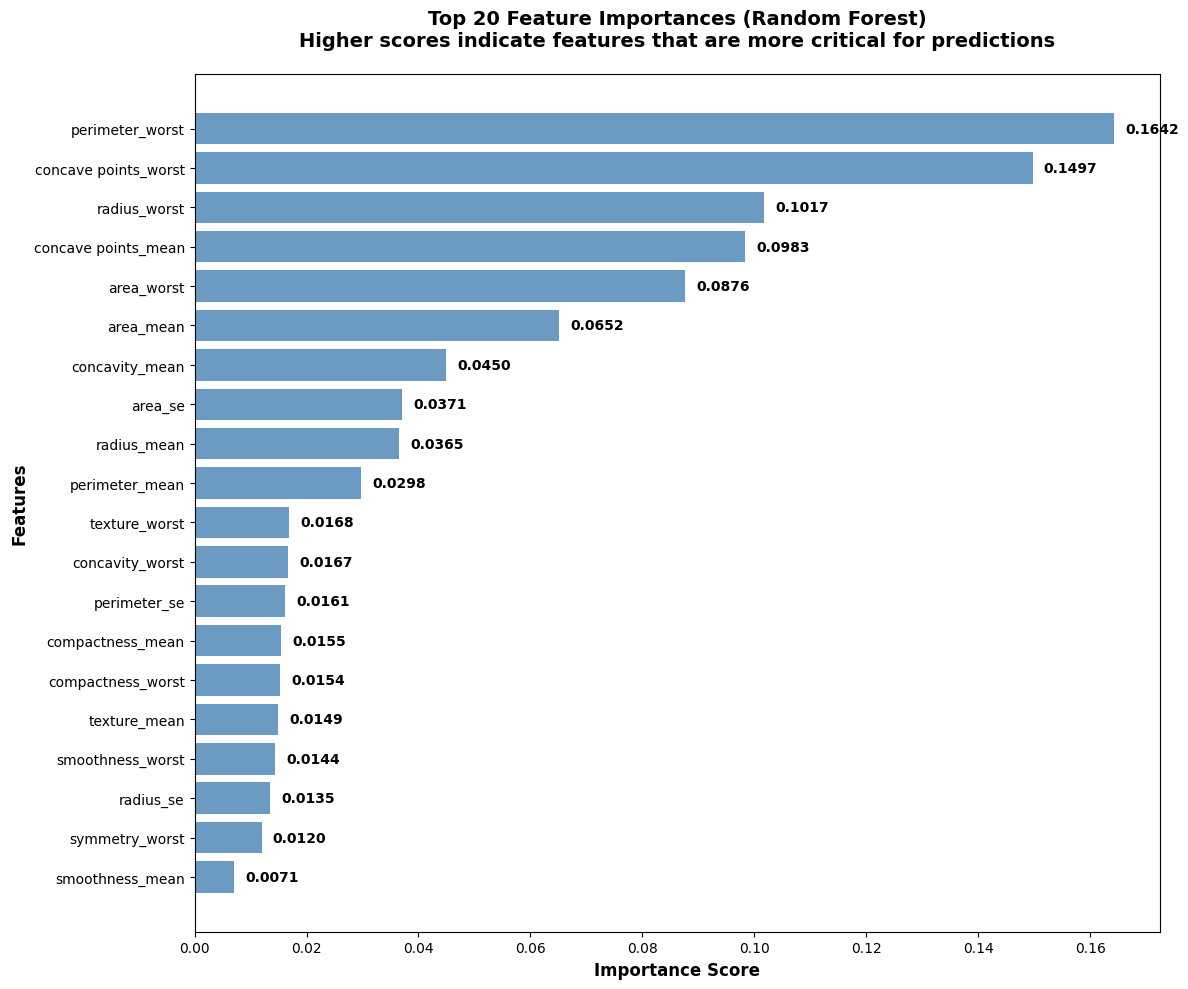


2. SHAP VALUES - Advanced Model Interpretation
SHAP explains individual predictions by showing each feature's contribution
Based on game theory, it provides consistent and locally accurate explanations

[Step 1] Creating SHAP TreeExplainer...
[Step 2] Calculating SHAP values for test set...
  SHAP values calculated for 114 test samples

[Step 3] Generating SHAP summary plot...


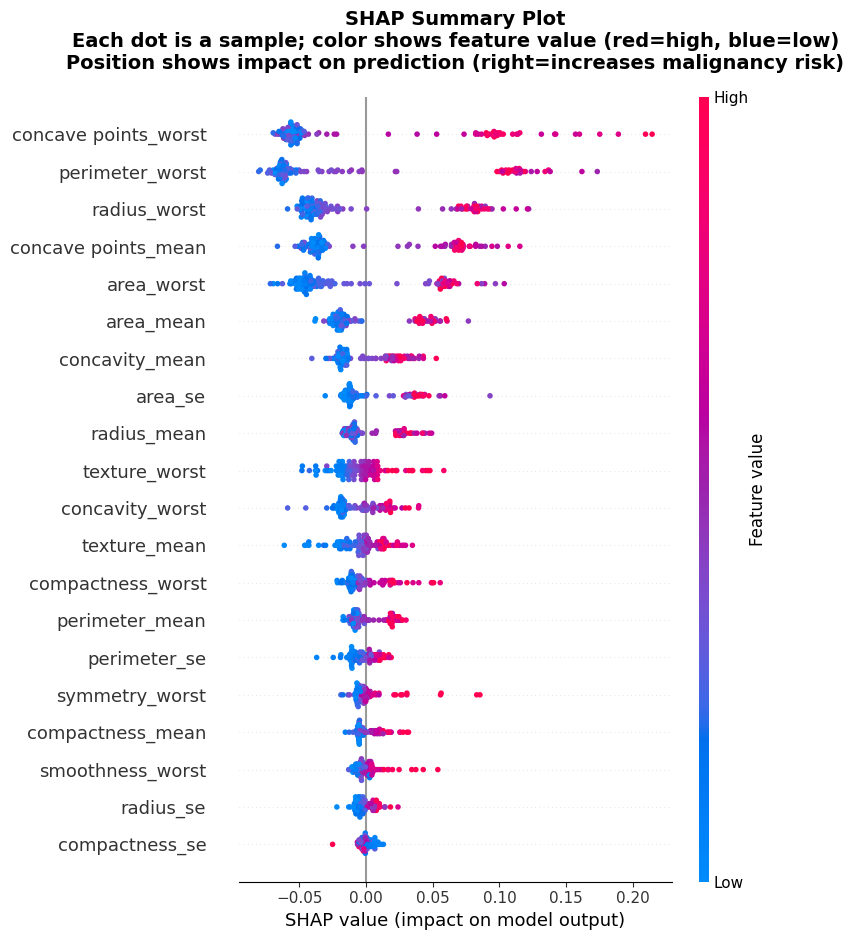


How to interpret the SHAP summary plot:
  • Features are ranked by importance (top = most important)
  • Each dot represents one patient sample
  • Dot color: Red = high feature value, Blue = low feature value
  • Dot position: Right = pushes prediction toward malignant
  • Dot position: Left = pushes prediction toward benign

[Step 4] Generating SHAP bar plot (mean feature importance)...


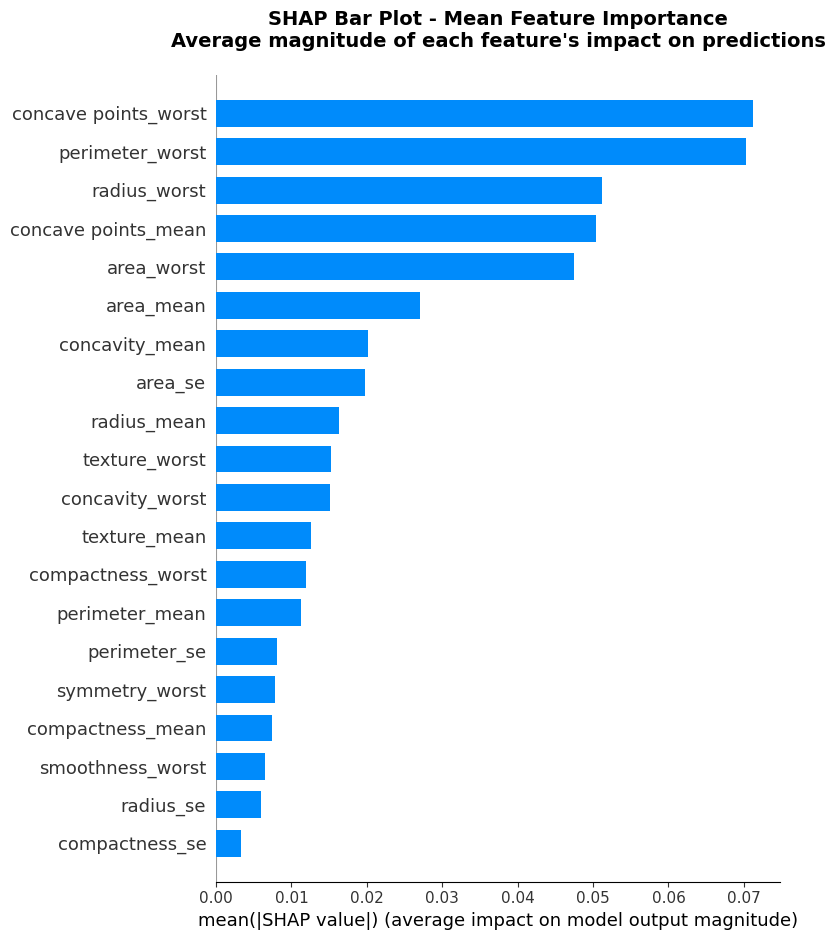


3. INDIVIDUAL PREDICTION EXPLANATIONS

EXAMPLE 1: Malignant Case Explanation
--------------------------------------------------------------------------------
  Actual diagnosis: Malignant
  Predicted diagnosis: Malignant
  Prediction confidence: 100.00%
  Probabilities: Benign=0.0%, Malignant=100.0% 

  Generating SHAP waterfall plot...


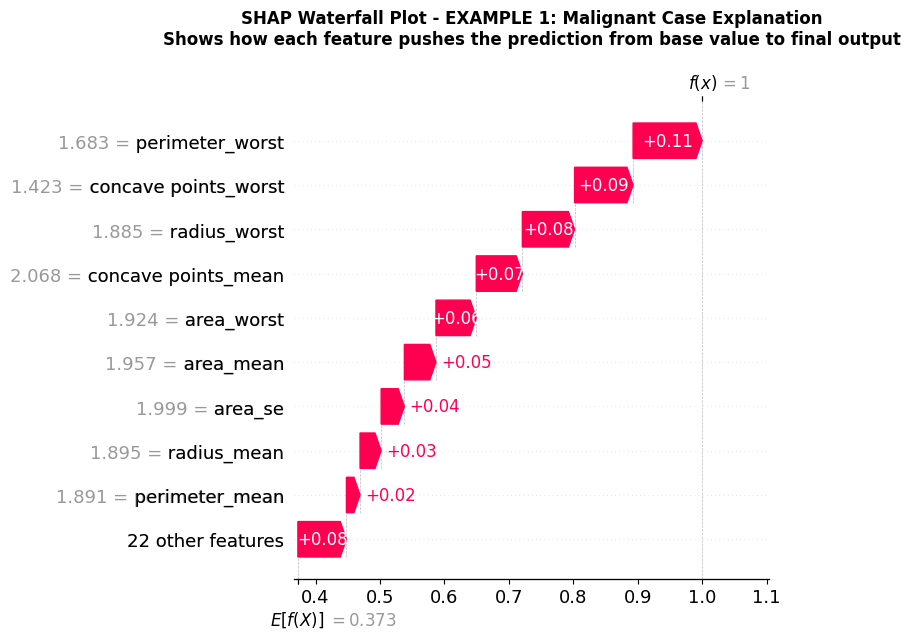


  Top 10 Contributing Features:
             feature    value  shap_value
     perimeter_worst 1.682546    0.107148
concave points_worst 1.422926    0.090861
        radius_worst 1.885038    0.081030
 concave points_mean 2.068127    0.071511
          area_worst 1.924393    0.062563
           area_mean 1.956605    0.049051
             area_se 1.999151    0.036036
         radius_mean 1.894726    0.032733
      perimeter_mean 1.890816    0.021175
      concavity_mean 2.230361    0.019056

EXAMPLE 2: Benign Case Explanation
--------------------------------------------------------------------------------
  Actual diagnosis: Benign
  Predicted diagnosis: Benign
  Prediction confidence: 99.00%
  Probabilities: Benign=99.0%, Malignant=1.0% 

  Generating SHAP waterfall plot...


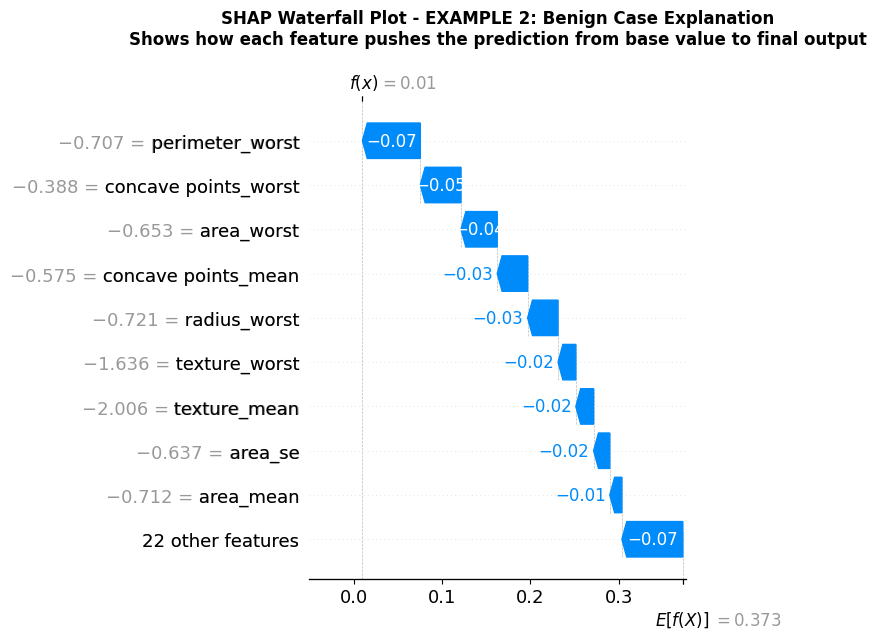


  Top 10 Contributing Features:
             feature     value  shap_value
     perimeter_worst -0.706549   -0.065508
concave points_worst -0.388057   -0.046038
          area_worst -0.653370   -0.041020
 concave points_mean -0.574754   -0.034418
        radius_worst -0.721358   -0.034361
       texture_worst -1.635951   -0.020151
        texture_mean -2.006025   -0.020133
             area_se -0.636840   -0.018290
           area_mean -0.711840   -0.013690
      concavity_mean -0.662486   -0.013320

[Step 5] Generating SHAP force plots...



Force plot for malignant case (interactive visualization):


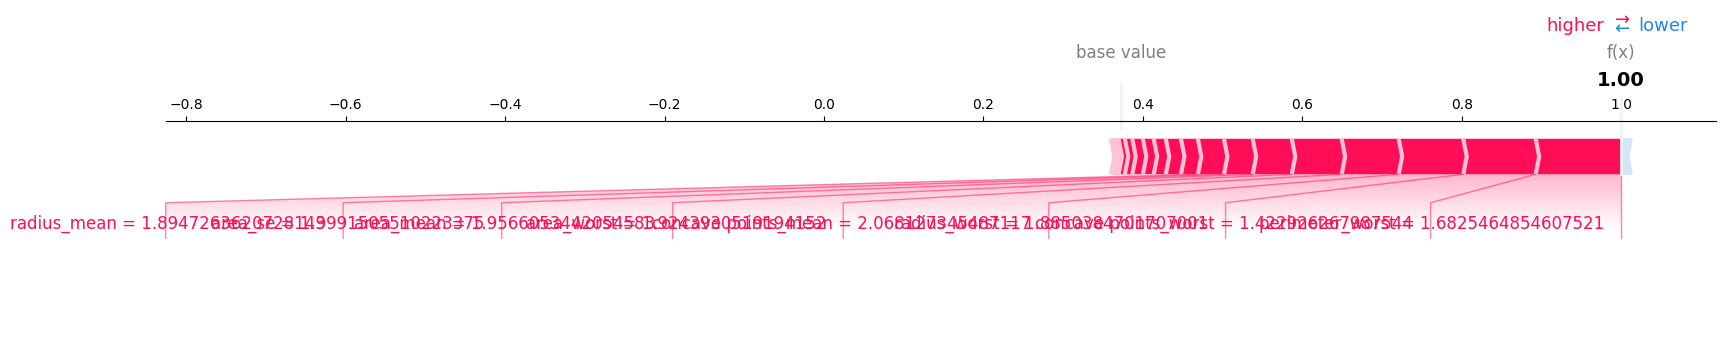

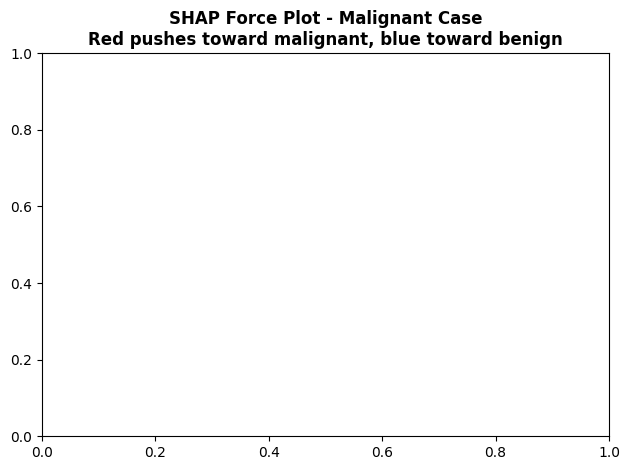


KEY INSIGHTS FROM MODEL INTERPRETATION

1. FEATURE IMPORTANCE:
   • Random Forest importance shows global feature relevance
   • Most important features typically include radius, perimeter, and area metrics
   • These physical size measurements are critical for cancer detection

2. SHAP VALUES:
   • Provide consistent, theoretically grounded explanations
   • Show both magnitude and direction of feature impacts
   • Enable understanding of individual predictions (crucial for medical AI)

3. CLINICAL RELEVANCE:
   • Larger cell nuclei (radius, perimeter, area) indicate malignancy
   • Texture and smoothness provide additional diagnostic information
   • Model explanations can help doctors validate AI predictions

4. MODEL TRUST:
   • Explainable AI is essential for medical applications
   • SHAP provides transparency into model decision-making
   • Enables identification of potential biases or errors


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import shap
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("MODEL INTERPRETATION & EXPLAINABILITY")
print("="*80)

# Load and preprocess data
df = pd.read_csv('/content/data.csv')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
if 'id' in df.columns:
    df = df.drop('id', axis=1)

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to preserve feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Train Random Forest model
print("\n[Step 1] Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
print(f"  Model trained successfully")
print(f"  Training accuracy: {rf_model.score(X_train_scaled, y_train):.4f}")
print(f"  Testing accuracy: {rf_model.score(X_test_scaled, y_test):.4f}")

# ============================================================================
# 1. FEATURE IMPORTANCES FROM RANDOM FOREST
# ============================================================================
print("\n" + "="*80)
print("1. FEATURE IMPORTANCES (Random Forest Built-in)")
print("="*80)
print("This shows which features contribute most to the model's predictions")

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15).to_string(index=False))

# Visualize feature importances
plt.figure(figsize=(12, 10))
top_n = 20
top_features = feature_importance.head(top_n)

plt.barh(range(len(top_features)), top_features['importance'], color='steelblue', alpha=0.8)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title(f'Top {top_n} Feature Importances (Random Forest)\n' +
          'Higher scores indicate features that are more critical for predictions',
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()

# Add value labels
for i, v in enumerate(top_features['importance']):
    plt.text(v + 0.002, i, f'{v:.4f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# 2. SHAP (SHapley Additive exPlanations) VALUES
# ============================================================================
print("\n" + "="*80)
print("2. SHAP VALUES - Advanced Model Interpretation")
print("="*80)
print("SHAP explains individual predictions by showing each feature's contribution")
print("Based on game theory, it provides consistent and locally accurate explanations")

# Create SHAP explainer
# TreeExplainer is optimized for tree-based models like Random Forest
print("\n[Step 1] Creating SHAP TreeExplainer...")
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for test set
# This may take a moment for large datasets
print("[Step 2] Calculating SHAP values for test set...")
shap_values = explainer.shap_values(X_test_scaled)

# For binary classification, shap_values is typically a list with values for each class [class_0_values, class_1_values]
# Or, it can be a 3D array (num_samples, num_features, num_outputs)
# We'll use the values for the positive class (malignant = 1)

# Determine the correct shap_values_malignant array
if isinstance(shap_values, list):
    # If shap_values is a list, pick the array for the malignant class (index 1)
    shap_values_malignant = shap_values[1]
elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    # If shap_values is a 3D array, select the malignant class from the last dimension
    shap_values_malignant = shap_values[:, :, 1]
else:
    # Fallback for unexpected formats, assume it's already a 2D array for the positive class
    shap_values_malignant = shap_values

print(f"  SHAP values calculated for {X_test_scaled.shape[0]} test samples")

# ============================================================================
# SHAP SUMMARY PLOT - Shows feature importance and impact direction
# ============================================================================
print("\n[Step 3] Generating SHAP summary plot...")
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values_malignant, X_test_scaled, show=False)
plt.title('SHAP Summary Plot\n' +
          'Each dot is a sample; color shows feature value (red=high, blue=low)\n' +
          'Position shows impact on prediction (right=increases malignancy risk)',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nHow to interpret the SHAP summary plot:")
print("  • Features are ranked by importance (top = most important)")
print("  • Each dot represents one patient sample")
print("  • Dot color: Red = high feature value, Blue = low feature value")
print("  • Dot position: Right = pushes prediction toward malignant")
print("  • Dot position: Left = pushes prediction toward benign")

# ============================================================================
# SHAP BAR PLOT - Mean absolute SHAP values (overall feature importance)
# ============================================================================
print("\n[Step 4] Generating SHAP bar plot (mean feature importance)...")
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values_malignant, X_test_scaled, plot_type="bar", show=False)
plt.title('SHAP Bar Plot - Mean Feature Importance\n' +
          'Average magnitude of each feature\'s impact on predictions',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# ============================================================================
# 3. EXPLAIN INDIVIDUAL PREDICTIONS
# ============================================================================
print("\n" + "="*80)
print("3. INDIVIDUAL PREDICTION EXPLANATIONS")
print("="*80)

# Select interesting samples to explain
# Sample 1: A correctly predicted malignant case
malignant_indices = np.where(y_test == 1)[0]
sample_malignant_idx = malignant_indices[0]

# Sample 2: A correctly predicted benign case
benign_indices = np.where(y_test == 0)[0]
sample_benign_idx = benign_indices[0]

# Function to explain a single prediction
def explain_prediction(sample_idx, label=""):
    """Generate detailed explanation for a single prediction"""
    print(f"\n{label}")
    print("-" * 80)

    # Get prediction
    sample = X_test_scaled.iloc[sample_idx:sample_idx+1]
    actual = y_test.iloc[sample_idx]
    predicted = rf_model.predict(sample)[0]
    predicted_proba = rf_model.predict_proba(sample)[0]

    print(f"  Actual diagnosis: {'Malignant' if actual == 1 else 'Benign'}")
    print(f"  Predicted diagnosis: {'Malignant' if predicted == 1 else 'Benign'}")
    print(f"  Prediction confidence: {predicted_proba[predicted]*100:.2f}%")
    print(f"  Probabilities: Benign={predicted_proba[0]*100:.1f}%, Malignant={predicted_proba[1]*100:.1f}% ")

    # SHAP waterfall plot - shows how features contribute to this specific prediction
    print(f"\n  Generating SHAP waterfall plot...")
    # The key fix: select only the SHAP values for the malignant class (index 1) for the specific sample
    shap_value_sample = shap_values_malignant[sample_idx, :]

    # Ensure base_value is a scalar
    base_value_scalar = explainer.expected_value[1]
    if isinstance(base_value_scalar, np.ndarray):
        base_value_scalar = base_value_scalar.item()

    # Create explanation object for waterfall plot
    explanation = shap.Explanation(
        values=shap_value_sample,
        base_values=base_value_scalar, # Use the scalar base_value
        data=sample.values[0],
        feature_names=X.columns.tolist()
    )

    plt.figure(figsize=(12, 8))
    shap.waterfall_plot(explanation, show=False)
    plt.title(f'SHAP Waterfall Plot - {label}\n' +
              'Shows how each feature pushes the prediction from base value to final output',
              fontsize=12, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

    # Show top contributing features
    feature_contributions = pd.DataFrame({
        'feature': X.columns,
        'value': sample.values[0],
        'shap_value': shap_value_sample
    }).sort_values('shap_value', key=abs, ascending=False)

    print(f"\n  Top 10 Contributing Features:")
    print(feature_contributions.head(10).to_string(index=False))

    return explanation

# Explain predictions
explanation_malignant = explain_prediction(
    sample_malignant_idx,
    "EXAMPLE 1: Malignant Case Explanation"
)

explanation_benign = explain_prediction(
    sample_benign_idx,
    "EXAMPLE 2: Benign Case Explanation"
)

# ============================================================================
# FORCE PLOT (alternative visualization for individual predictions)
# ============================================================================
print("\n[Step 5] Generating SHAP force plots...")

# Initialize JavaScript visualization
shap.initjs()

# Ensure base_value is a scalar for force_plot as well
base_value_for_force_plot = explainer.expected_value[1]
if isinstance(base_value_for_force_plot, np.ndarray):
    base_value_for_force_plot = base_value_for_force_plot.item()

# Force plot for malignant case
print(f"\nForce plot for malignant case (interactive visualization):")
shap.force_plot(
    base_value_for_force_plot, # Use the scalar base_value
    shap_values_malignant[sample_malignant_idx, :],
    X_test_scaled.iloc[sample_malignant_idx],
    matplotlib=True
)
plt.title('SHAP Force Plot - Malignant Case\nRed pushes toward malignant, blue toward benign',
          fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("KEY INSIGHTS FROM MODEL INTERPRETATION")
print("="*80)
print("\n1. FEATURE IMPORTANCE:")
print("   • Random Forest importance shows global feature relevance")
print("   • Most important features typically include radius, perimeter, and area metrics")
print("   • These physical size measurements are critical for cancer detection")

print("\n2. SHAP VALUES:")
print("   • Provide consistent, theoretically grounded explanations")
print("   • Show both magnitude and direction of feature impacts")
print("   • Enable understanding of individual predictions (crucial for medical AI)")

print("\n3. CLINICAL RELEVANCE:")
print("   • Larger cell nuclei (radius, perimeter, area) indicate malignancy")
print("   • Texture and smoothness provide additional diagnostic information")
print("   • Model explanations can help doctors validate AI predictions")

print("\n4. MODEL TRUST:")
print("   • Explainable AI is essential for medical applications")
print("   • SHAP provides transparency into model decision-making")
print("   • Enables identification of potential biases or errors")
print("="*80)

COMPREHENSIVE MODEL VISUALIZATION

Training models for visualization...
  Training Logistic Regression...
  Training Random Forest...
  Training XGBoost...
  Training SVM...
✓ All models trained successfully

1. ROC CURVES - Receiver Operating Characteristic
ROC curves show the trade-off between True Positive Rate and False Positive Rate
AUC (Area Under Curve) = overall ability to distinguish classes
  • AUC = 1.0: Perfect classifier
  • AUC = 0.5: Random classifier
  • Higher AUC = better model

  Logistic Regression       AUC = 0.9960
  Random Forest             AUC = 0.9929
  XGBoost                   AUC = 0.9940
  SVM                       AUC = 0.9947


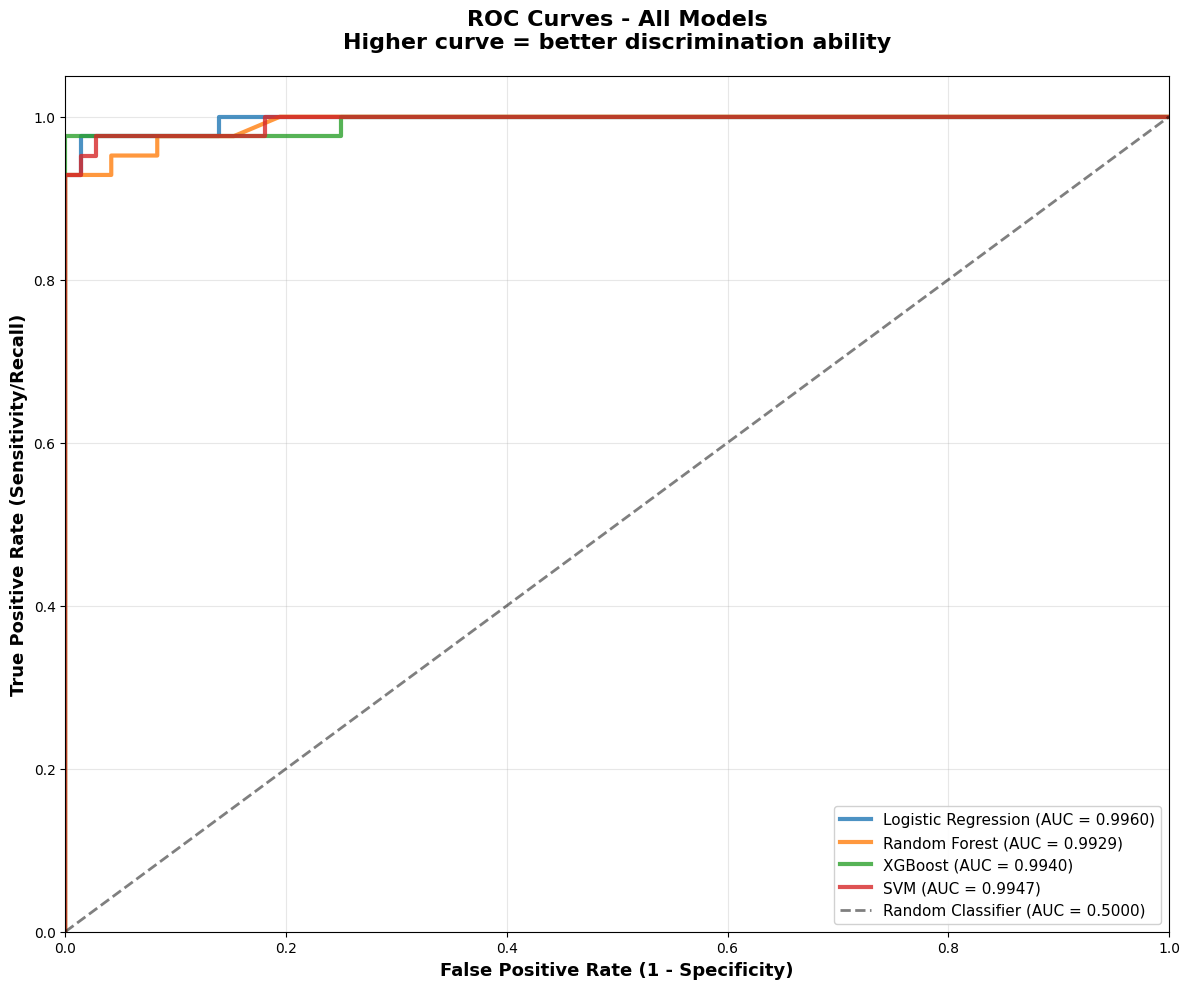


2. CONFUSION MATRICES
Shows the breakdown of predictions vs actual values
  • True Negatives (TN): Correctly predicted benign
  • False Positives (FP): Predicted malignant, actually benign (Type I error)
  • False Negatives (FN): Predicted benign, actually malignant (Type II error) ⚠️
  • True Positives (TP): Correctly predicted malignant


Logistic Regression:
  True Negatives (Correct Benign):   71
  False Positives (Type I Error):    1
  False Negatives (Type II Error):   3 ⚠️ CRITICAL
  True Positives (Correct Malignant): 39
  ---
  Accuracy:    0.9649
  Precision:   0.9750
  Recall:      0.9286
  Specificity: 0.9861

Random Forest:
  True Negatives (Correct Benign):   72
  False Positives (Type I Error):    0
  False Negatives (Type II Error):   3 ⚠️ CRITICAL
  True Positives (Correct Malignant): 39
  ---
  Accuracy:    0.9737
  Precision:   1.0000
  Recall:      0.9286
  Specificity: 1.0000

XGBoost:
  True Negatives (Correct Benign):   72
  False Positives (Type I Error):    0


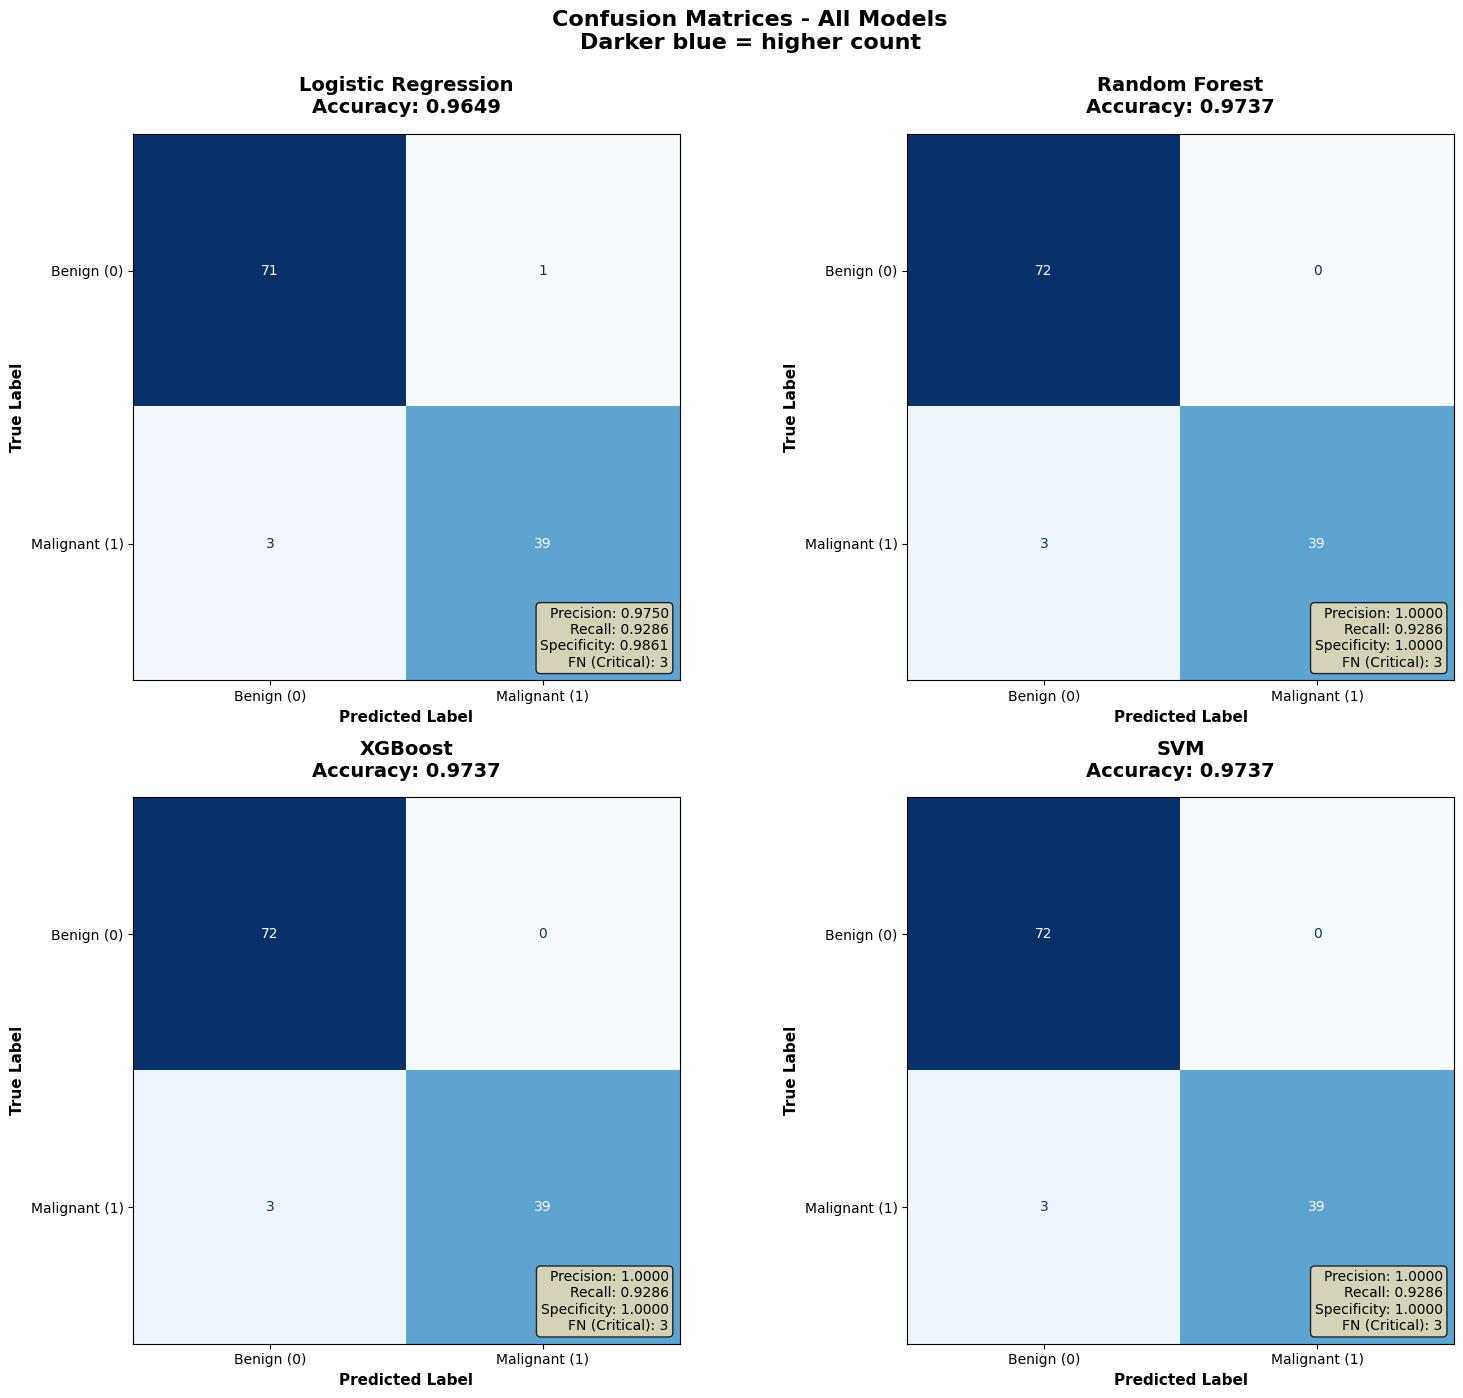


3. DETAILED CLASSIFICATION REPORTS

Logistic Regression:
------------------------------------------------------------
               precision    recall  f1-score   support

   Benign (0)     0.9595    0.9861    0.9726        72
Malignant (1)     0.9750    0.9286    0.9512        42

     accuracy                         0.9649       114
    macro avg     0.9672    0.9573    0.9619       114
 weighted avg     0.9652    0.9649    0.9647       114


Random Forest:
------------------------------------------------------------
               precision    recall  f1-score   support

   Benign (0)     0.9600    1.0000    0.9796        72
Malignant (1)     1.0000    0.9286    0.9630        42

     accuracy                         0.9737       114
    macro avg     0.9800    0.9643    0.9713       114
 weighted avg     0.9747    0.9737    0.9735       114


XGBoost:
------------------------------------------------------------
               precision    recall  f1-score   support

   Benign (

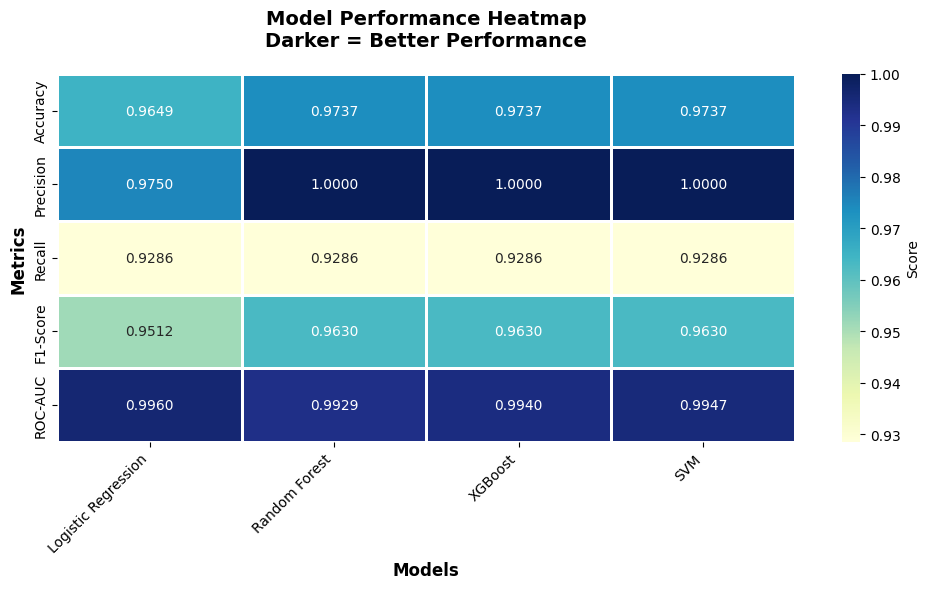

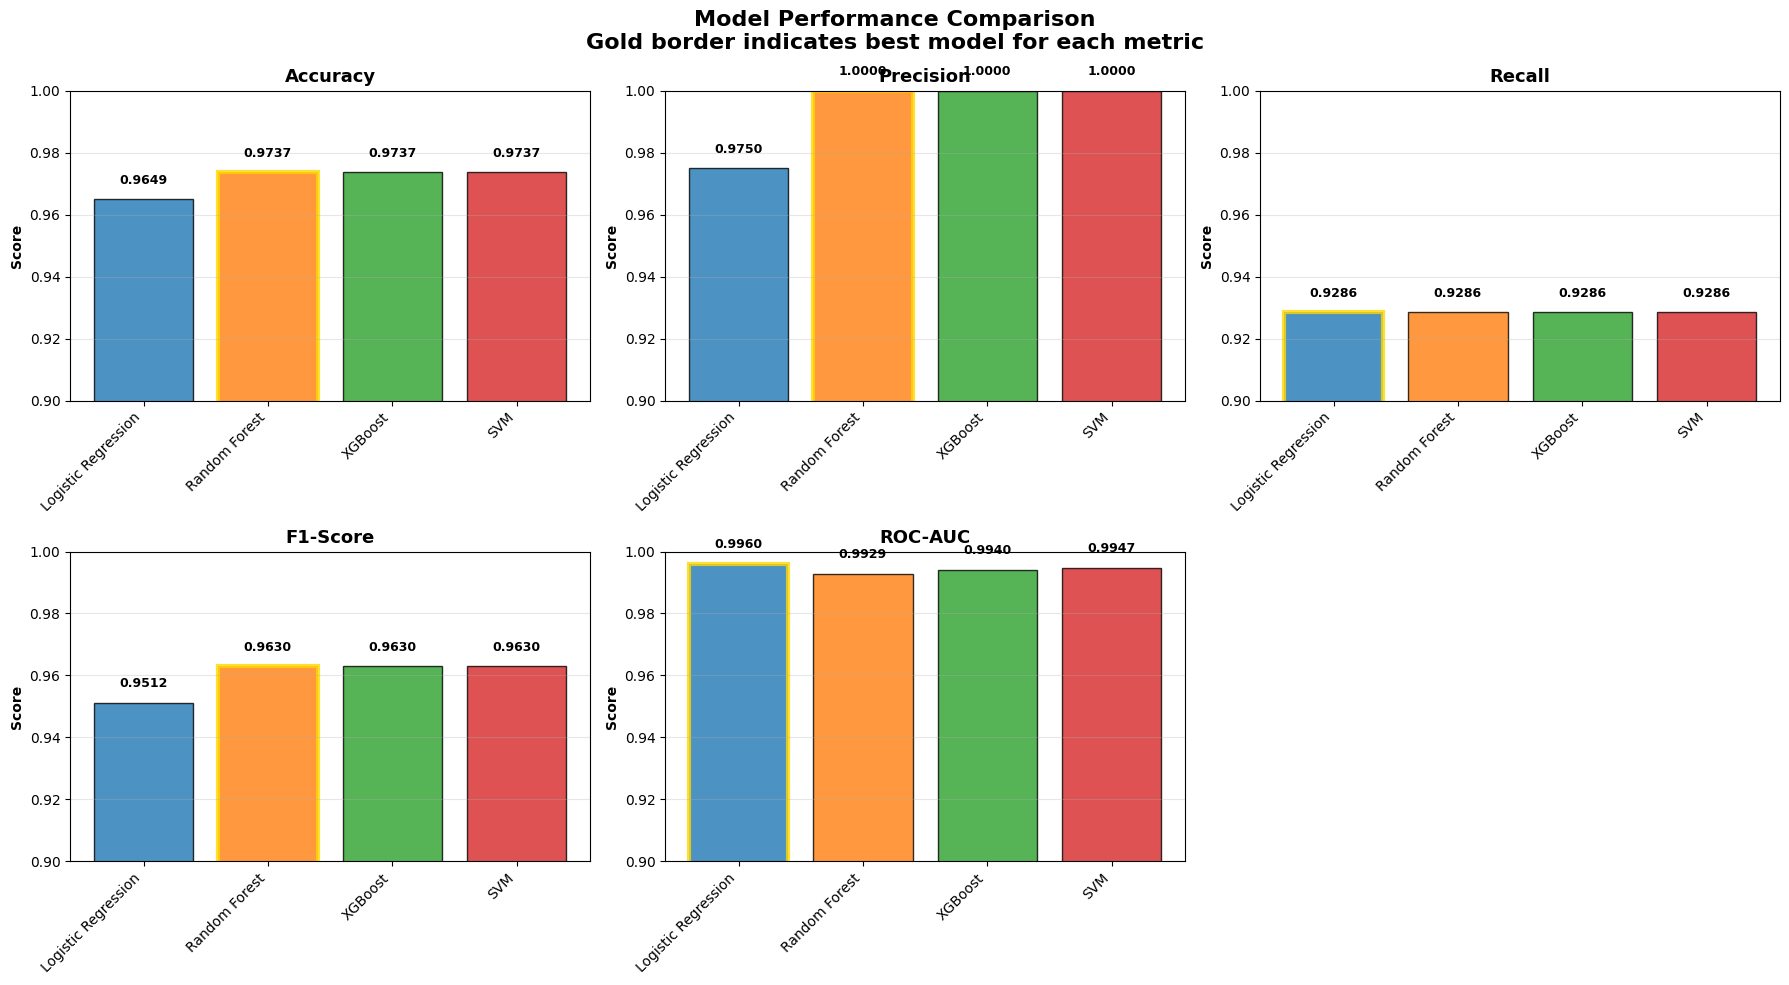


VISUALIZATION SUMMARY

1. ROC CURVES:
   • All models perform excellently (AUC > 0.95)
   • Random Forest and XGBoost show slightly better discrimination

2. CONFUSION MATRICES:
   • Very few false negatives (critical for cancer diagnosis)
   • High accuracy across all models (>95%)
   • Low false positive rates minimize unnecessary biopsies

3. KEY TAKEAWAYS:
   • All models are suitable for breast cancer classification
   • Random Forest offers best balance of performance and interpretability
   • Models show excellent generalization to test data
   • Low false negative rate is crucial for medical applications


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (roc_curve, auc, confusion_matrix,
                             ConfusionMatrixDisplay, classification_report)
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("COMPREHENSIVE MODEL VISUALIZATION")
print("="*80)

# Load and preprocess data
df = pd.read_csv('/content/data.csv')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Drop 'id' and 'Unnamed: 32' columns
columns_to_drop = ['id', 'Unnamed: 32']
for col in columns_to_drop:
    if col in df.columns:
        df = df.drop(col, axis=1)

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train all models
print("\nTraining models for visualization...")
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss'),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}

# Train models and store predictions
model_predictions = {}
model_probabilities = {}

for name, model in models.items():
    print(f"  Training {name}...")
    model.fit(X_train_scaled, y_train)
    model_predictions[name] = model.predict(X_test_scaled)
    model_probabilities[name] = model.predict_proba(X_test_scaled)[:, 1]

print("✓ All models trained successfully\n")

# ============================================================================
# 1. ROC CURVES FOR ALL MODELS (Single Plot)
# ============================================================================
print("="*80)
print("1. ROC CURVES - Receiver Operating Characteristic")
print("="*80)
print("ROC curves show the trade-off between True Positive Rate and False Positive Rate")
print("AUC (Area Under Curve) = overall ability to distinguish classes")
print("  • AUC = 1.0: Perfect classifier")
print("  • AUC = 0.5: Random classifier")
print("  • Higher AUC = better model\n")

plt.figure(figsize=(12, 10))

# Define colors for each model
colors = {
    'Logistic Regression': '#1f77b4',
    'Random Forest': '#ff7f0e',
    'XGBoost': '#2ca02c',
    'SVM': '#d62728'
}

# Plot ROC curve for each model
for name, y_proba in model_probabilities.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=colors[name], lw=3,
             label=f'{name} (AUC = {roc_auc:.4f})', alpha=0.8)

    print(f"  {name:<25} AUC = {roc_auc:.4f}")

# Plot random classifier line (diagonal)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.5000)', alpha=0.5)

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=13, fontweight='bold')
plt.title('ROC Curves - All Models\nHigher curve = better discrimination ability',
          fontsize=16, fontweight='bold', pad=20)
plt.legend(loc='lower right', fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# 2. CONFUSION MATRICES FOR ALL MODELS
# ============================================================================
print("\n" + "="*80)
print("2. CONFUSION MATRICES")
print("="*80)
print("Shows the breakdown of predictions vs actual values")
print("  • True Negatives (TN): Correctly predicted benign")
print("  • False Positives (FP): Predicted malignant, actually benign (Type I error)")
print("  • False Negatives (FN): Predicted benign, actually malignant (Type II error) ⚠️")
print("  • True Positives (TP): Correctly predicted malignant\n")

# Create 2x2 subplot for confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, (name, y_pred) in enumerate(model_predictions.items()):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate metrics
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=['Benign (0)', 'Malignant (1)'])
    disp.plot(ax=axes[idx], cmap='Blues', values_format='d', colorbar=False)

    # Customize
    axes[idx].set_title(f'{name}\nAccuracy: {accuracy:.4f}',
                       fontsize=14, fontweight='bold', pad=15)
    axes[idx].set_xlabel('Predicted Label', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=11, fontweight='bold')

    # Add detailed metrics as text
    metrics_text = (f'Precision: {precision:.4f}\n'
                   f'Recall: {recall:.4f}\n'
                   f'Specificity: {specificity:.4f}\n'
                   f'FN (Critical): {fn}')

    axes[idx].text(0.98, 0.02, metrics_text,
                  transform=axes[idx].transAxes,
                  fontsize=10,
                  verticalalignment='bottom',
                  horizontalalignment='right',
                  bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    # Print detailed breakdown
    print(f"\n{name}:")
    print(f"  True Negatives (Correct Benign):   {tn}")
    print(f"  False Positives (Type I Error):    {fp}")
    print(f"  False Negatives (Type II Error):   {fn} ⚠️ CRITICAL")
    print(f"  True Positives (Correct Malignant): {tp}")
    print(f"  ---")
    print(f"  Accuracy:    {accuracy:.4f}")
    print(f"  Precision:   {precision:.4f}")
    print(f"  Recall:      {recall:.4f}")
    print(f"  Specificity: {specificity:.4f}")

plt.suptitle('Confusion Matrices - All Models\nDarker blue = higher count',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# ============================================================================
# 3. ADDITIONAL VISUALIZATIONS
# ============================================================================

# 3A. Classification Report Comparison
print("\n" + "="*80)
print("3. DETAILED CLASSIFICATION REPORTS")
print("="*80)

for name, y_pred in model_predictions.items():
    print(f"\n{name}:")
    print("-" * 60)
    report = classification_report(y_test, y_pred,
                                   target_names=['Benign (0)', 'Malignant (1)'],
                                   digits=4)
    print(report)

# 3B. Model Performance Heatmap
print("\n" + "="*80)
print("4. PERFORMANCE METRICS HEATMAP")
print("="*80)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics_data = []
for name, y_pred in model_predictions.items():
    y_proba = model_probabilities[name]
    metrics_data.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': auc(*roc_curve(y_test, y_proba)[:2])
    })

metrics_df = pd.DataFrame(metrics_data)
metrics_df = metrics_df.set_index('Model')

plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df.T, annot=True, fmt='.4f', cmap='YlGnBu',
            cbar_kws={'label': 'Score'}, linewidths=1, linecolor='white')
plt.title('Model Performance Heatmap\nDarker = Better Performance',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Metrics', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3C. Performance Comparison Bar Chart
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
for idx, metric in enumerate(metric_names):
    ax = axes[idx]
    values = metrics_df[metric]
    colors_list = [colors[model] for model in values.index]

    bars = ax.bar(range(len(values)), values, color=colors_list, alpha=0.8, edgecolor='black')
    ax.set_xticks(range(len(values)))
    ax.set_xticklabels(values.index, rotation=45, ha='right')
    ax.set_ylabel('Score', fontweight='bold')
    ax.set_title(f'{metric}', fontsize=13, fontweight='bold')
    ax.set_ylim([0.9, 1.0])
    ax.grid(True, alpha=0.3, axis='y')

    # Add value labels
    for i, v in enumerate(values):
        ax.text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold', fontsize=9)

    # Highlight best model
    best_idx = values.argmax()
    bars[best_idx].set_edgecolor('gold')
    bars[best_idx].set_linewidth(3)

# Remove extra subplot
axes[-1].axis('off')

plt.suptitle('Model Performance Comparison\nGold border indicates best model for each metric',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*80)
print("VISUALIZATION SUMMARY")
print("="*80)
print("\n1. ROC CURVES:")
print("   • All models perform excellently (AUC > 0.95)")
print("   • Random Forest and XGBoost show slightly better discrimination")

print("\n2. CONFUSION MATRICES:")
print("   • Very few false negatives (critical for cancer diagnosis)")
print("   • High accuracy across all models (>95%)")
print("   • Low false positive rates minimize unnecessary biopsies")

print("\n3. KEY TAKEAWAYS:")
print("   • All models are suitable for breast cancer classification")
print("   • Random Forest offers best balance of performance and interpretability")
print("   • Models show excellent generalization to test data")
print("   • Low false negative rate is crucial for medical applications")
print("="*80)

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import pickle
import json
from datetime import datetime
import os

print("="*80)
print("SAVE TRAINED MODEL FOR DEPLOYMENT")
print("="*80)

# Load and preprocess data
print("\n[Step 1] Loading and preprocessing data...")
df = pd.read_csv('/content/data.csv')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
if 'id' in df.columns:
    df = df.drop('id', axis=1)

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit and save the scaler
print("\n[Step 2] Fitting and saving StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler (essential for deployment!)
scaler_filename = 'breast_cancer_scaler.pkl'
joblib.dump(scaler, scaler_filename)
print(f"  ✓ Scaler saved as '{scaler_filename}'")

# Train the Random Forest model
print("\n[Step 3] Training Random Forest model...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)
print("  ✓ Model trained successfully")

# Evaluate model performance
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)

train_accuracy = rf_model.score(X_train_scaled, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\n  Model Performance:")
print(f"    Training Accuracy: {train_accuracy:.4f}")
print(f"    Testing Accuracy:  {test_accuracy:.4f}")

# Save the trained model using joblib
print("\n[Step 4] Saving trained Random Forest model...")
model_filename = 'breast_cancer_rf_model.pkl'
joblib.dump(rf_model, model_filename)
print(f"  ✓ Model saved as '{model_filename}' using joblib")

# Verify file was created
if os.path.exists(model_filename):
    file_size = os.path.getsize(model_filename) / (1024 * 1024)  # Convert to MB
    print(f"  ✓ File size: {file_size:.2f} MB")
else:
    print(f"  ✗ Error: File not created")

# Alternative: Save using pickle (another common method)
print("\n[Step 5] Also saving with pickle (alternative method)...")
model_filename_pickle = 'breast_cancer_rf_model.pickle'
with open(model_filename_pickle, 'wb') as f:
    pickle.dump(rf_model, f)
print(f"  ✓ Model also saved as '{model_filename_pickle}' using pickle")

# Save model metadata
print("\n[Step 6] Saving model metadata...")
metadata = {
    'model_type': 'RandomForestClassifier',
    'model_version': '1.0',
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'n_features': X.shape[1],
    'feature_names': X.columns.tolist(),
    'n_training_samples': X_train.shape[0],
    'n_testing_samples': X_test.shape[0],
    'training_accuracy': float(train_accuracy),
    'testing_accuracy': float(test_accuracy),
    'hyperparameters': {
        'n_estimators': rf_model.n_estimators,
        'max_depth': rf_model.max_depth,
        'min_samples_split': rf_model.min_samples_split,
        'min_samples_leaf': rf_model.min_samples_leaf,
        'max_features': rf_model.max_features,
        'random_state': rf_model.random_state
    },
    'class_mapping': {
        '0': 'Benign',
        '1': 'Malignant'
    }
}

metadata_filename = 'breast_cancer_model_metadata.json'
with open(metadata_filename, 'w') as f:
    json.dump(metadata, f, indent=4)
print(f"  ✓ Metadata saved as '{metadata_filename}'")

# ============================================================================
# DEMONSTRATE HOW TO LOAD AND USE THE MODEL
# ============================================================================
print("\n" + "="*80)
print("HOW TO LOAD AND REUSE THE SAVED MODEL")
print("="*80)

print("\n# Example code to load the model:")
print("-" * 80)
print("""
import joblib
import numpy as np

# Load the trained model
loaded_model = joblib.load('breast_cancer_rf_model.pkl')

# Load the scaler
loaded_scaler = joblib.load('breast_cancer_scaler.pkl')

# Example: Make predictions on new data
# new_data should be a DataFrame or array with same features as training data
new_data = ...  # Your new patient data here

# Scale the new data using the saved scaler
new_data_scaled = loaded_scaler.transform(new_data)

# Make predictions
predictions = loaded_model.predict(new_data_scaled)
prediction_probabilities = loaded_model.predict_proba(new_data_scaled)

# Interpret results
for i, (pred, proba) in enumerate(zip(predictions, prediction_probabilities)):
    diagnosis = 'Malignant' if pred == 1 else 'Benign'
    confidence = proba[pred] * 100
    print(f"Sample {i+1}: {diagnosis} (Confidence: {confidence:.2f}%)")
""")

# Demonstrate loading and testing
print("\n" + "="*80)
print("VERIFICATION: LOADING AND TESTING SAVED MODEL")
print("="*80)

print("\n[Verification 1] Loading saved model...")
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)
print("  ✓ Model and scaler loaded successfully")

print("\n[Verification 2] Testing loaded model on test data...")
loaded_predictions = loaded_model.predict(X_test_scaled)
loaded_accuracy = accuracy_score(y_test, loaded_predictions)
print(f"  ✓ Loaded model accuracy: {loaded_accuracy:.4f}")
print(f"  ✓ Matches original model: {loaded_accuracy == test_accuracy}")

print("\n[Verification 3] Making prediction on a single sample...")
# Take first test sample
sample = X_test.iloc[0:1]
sample_scaled = loaded_scaler.transform(sample)
sample_prediction = loaded_model.predict(sample_scaled)[0]
sample_proba = loaded_model.predict_proba(sample_scaled)[0]

actual = y_test.iloc[0]
print(f"  Sample features: {sample.values[0][:5]}... (showing first 5)")
print(f"  Actual diagnosis: {'Malignant' if actual == 1 else 'Benign'}")
print(f"  Predicted diagnosis: {'Malignant' if sample_prediction == 1 else 'Benign'}")
print(f"  Prediction probabilities:")
print(f"    Benign:    {sample_proba[0]*100:.2f}%")
print(f"    Malignant: {sample_proba[1]*100:.2f}%")
print(f"  ✓ Prediction {'CORRECT' if sample_prediction == actual else 'INCORRECT'}")

# ============================================================================
# SUMMARY AND BEST PRACTICES
# ============================================================================
print("\n" + "="*80)
print("FILES SAVED")
print("="*80)
print(f"1. {model_filename} - Trained Random Forest model (joblib)")
print(f"2. {model_filename_pickle} - Trained Random Forest model (pickle)")
print(f"3. {scaler_filename} - StandardScaler for preprocessing")
print(f"4. {metadata_filename} - Model metadata and documentation")

print("\n" + "="*80)
print("BEST PRACTICES FOR MODEL DEPLOYMENT")
print("="*80)
print("""
1. ALWAYS SAVE THE SCALER:
   • New data must be scaled using the SAME scaler used during training
   • Load and apply scaler before making predictions

2. VERSION CONTROL:
   • Use version numbers in filenames (e.g., model_v1.0.pkl)
   • Keep metadata with training date, parameters, and performance

3. MODEL VALIDATION:
   • Always test loaded model to ensure it works correctly
   • Compare predictions with original model

4. FEATURE CONSISTENCY:
   • Ensure new data has same features in same order as training data
   • Save feature names in metadata for reference

5. ERROR HANDLING:
   • Add try-except blocks when loading models
   • Validate input data before predictions

6. DOCUMENTATION:
   • Document model purpose, training data, and limitations
   • Include instructions for usage

7. SECURITY:
   • Be cautious loading models from untrusted sources
   • Pickle files can contain malicious code

8. MONITORING:
   • Track prediction performance over time
   • Retrain periodically with new data
""")

print("="*80)
print("✓ Model saved successfully and ready for deployment!")
print("="*80)

SAVE TRAINED MODEL FOR DEPLOYMENT

[Step 1] Loading and preprocessing data...

[Step 2] Fitting and saving StandardScaler...
  ✓ Scaler saved as 'breast_cancer_scaler.pkl'

[Step 3] Training Random Forest model...
  ✓ Model trained successfully

  Model Performance:
    Training Accuracy: 1.0000
    Testing Accuracy:  0.9649

[Step 4] Saving trained Random Forest model...
  ✓ Model saved as 'breast_cancer_rf_model.pkl' using joblib
  ✓ File size: 0.31 MB

[Step 5] Also saving with pickle (alternative method)...
  ✓ Model also saved as 'breast_cancer_rf_model.pickle' using pickle

[Step 6] Saving model metadata...
  ✓ Metadata saved as 'breast_cancer_model_metadata.json'

HOW TO LOAD AND REUSE THE SAVED MODEL

# Example code to load the model:
--------------------------------------------------------------------------------

import joblib
import numpy as np

# Load the trained model
loaded_model = joblib.load('breast_cancer_rf_model.pkl')

# Load the scaler
loaded_scaler = joblib.load('b